In [1]:
#İmport all required libaries first.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold


In [2]:
df = pd.read_csv('stats_big5leagues.txt',sep=";", index_col='PlayerName')

In [3]:
df.head()

,Name,Position,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,...,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,SuccDrib,DribLegs,PlayerType,Value,Value2,Comp
PlayerName,,,,,,,,,,,,,,,,,,,,,
Aaron Connolly,Aaron Connolly,FW,19.0,1258,3,0.21,1,0.07,0.29,14.0,...,29.5,24,1.13,61.0,6.0,1.0,Forward,9.0,M,eng Premier League
Aaron Cresswell,Aaron Cresswell,DF,29.0,2727,3,0.10,0,0.00,0.10,30.3,...,33.2,31,0.97,26.0,16.0,2.0,Defender,10.0,M,eng Premier League
Aaron Leya Iseka,Aaron Leya Iseka,FW,21.0,777,2,0.23,0,0.00,0.23,8.6,...,20.4,22,0.27,39.0,7.0,0.0,Forward,600.0,K,fr Ligue 1
Aaron Ramsdale,Aaron Ramsdale,GK,21.0,3330,0,0.00,1,0.03,0.03,37.0,...,12.5,37,0.92,0.0,0.0,0.0,Goalkeeper,20.0,M,eng Premier League
Aaron Ramsey,Aaron Ramsey,MF,28.0,1051,3,0.26,1,0.09,0.34,11.7,...,28.4,24,2.25,61.0,16.0,0.0,Midfielder,20.0,M,it Serie A


In [4]:
def MorK(x):
    if(x['Value2']=='M'):
        return(1)
    else:
        return(0.001)
    
df['NetValue'] = df.apply(MorK, axis=1)

In [285]:
df

,Name,Position,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,...,MatchPlayed,PointPerMatch,TouchPenArea,SuccDrib,DribLegs,PlayerType,Value,Value2,Comp,NetValue
PlayerName,,,,,,,,,,,,,,,,,,,,,
Aaron Connolly,Aaron Connolly,FW,19.0,1258,3,0.21,1,0.07,0.29,14.0,...,24,1.13,61.0,6.0,1.0,Forward,9.0,M,eng Premier League,1.000
Aaron Cresswell,Aaron Cresswell,DF,29.0,2727,3,0.10,0,0.00,0.10,30.3,...,31,0.97,26.0,16.0,2.0,Defender,10.0,M,eng Premier League,1.000
Aaron Leya Iseka,Aaron Leya Iseka,FW,21.0,777,2,0.23,0,0.00,0.23,8.6,...,22,0.27,39.0,7.0,0.0,Forward,600.0,K,fr Ligue 1,0.001
Aaron Ramsdale,Aaron Ramsdale,GK,21.0,3330,0,0.00,1,0.03,0.03,37.0,...,37,0.92,0.0,0.0,0.0,Goalkeeper,20.0,M,eng Premier League,1.000
Aaron Ramsey,Aaron Ramsey,MF,28.0,1051,3,0.26,1,0.09,0.34,11.7,...,24,2.25,61.0,16.0,0.0,Midfielder,20.0,M,it Serie A,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ángel Montoro,Ángel Montoro,MF,31.0,973,2,0.18,5,0.46,0.65,10.8,...,15,1.60,13.0,6.0,2.0,Midfielder,2.0,M,es La Liga,1.000
Éder Militão,Éder Militão,DF,21.0,1022,0,0.00,0,0.00,0.00,11.4,...,15,2.33,4.0,1.0,0.0,Defender,20.0,M,es La Liga,1.000
Édgar Méndez,Édgar Méndez,MF,29.0,864,1,0.10,0,0.00,0.10,9.6,...,16,0.94,17.0,12.0,1.0,Midfielder,6.0,M,es La Liga,1.000


In [11]:
df['NetValue'] = df['Value']  * df['NetValue']
df

,Name,Position,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,...,MatchPlayed,PointPerMatch,TouchPenArea,SuccDrib,DribLegs,PlayerType,Value,Value2,Comp,NetValue
PlayerName,,,,,,,,,,,,,,,,,,,,,
Aaron Connolly,Aaron Connolly,FW,19.0,1258,3,0.21,1,0.07,0.29,14.0,...,24,1.13,61.0,6.0,1.0,Forward,9.0,M,eng Premier League,81.0
Aaron Cresswell,Aaron Cresswell,DF,29.0,2727,3,0.10,0,0.00,0.10,30.3,...,31,0.97,26.0,16.0,2.0,Defender,10.0,M,eng Premier League,100.0
Aaron Leya Iseka,Aaron Leya Iseka,FW,21.0,777,2,0.23,0,0.00,0.23,8.6,...,22,0.27,39.0,7.0,0.0,Forward,600.0,K,fr Ligue 1,360.0
Aaron Ramsdale,Aaron Ramsdale,GK,21.0,3330,0,0.00,1,0.03,0.03,37.0,...,37,0.92,0.0,0.0,0.0,Goalkeeper,20.0,M,eng Premier League,400.0
Aaron Ramsey,Aaron Ramsey,MF,28.0,1051,3,0.26,1,0.09,0.34,11.7,...,24,2.25,61.0,16.0,0.0,Midfielder,20.0,M,it Serie A,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ángel Montoro,Ángel Montoro,MF,31.0,973,2,0.18,5,0.46,0.65,10.8,...,15,1.60,13.0,6.0,2.0,Midfielder,2.0,M,es La Liga,4.0
Éder Militão,Éder Militão,DF,21.0,1022,0,0.00,0,0.00,0.00,11.4,...,15,2.33,4.0,1.0,0.0,Defender,20.0,M,es La Liga,400.0
Édgar Méndez,Édgar Méndez,MF,29.0,864,1,0.10,0,0.00,0.10,9.6,...,16,0.94,17.0,12.0,1.0,Midfielder,6.0,M,es La Liga,36.0


In [286]:
df = df[df['NetValue']<100]

<AxesSubplot:ylabel='Frequency'>

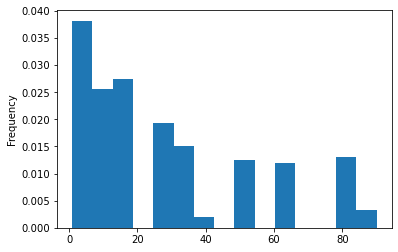

In [13]:
df["NetValue"].plot.hist(density=True, bins = 15)

<AxesSubplot:ylabel='Frequency'>

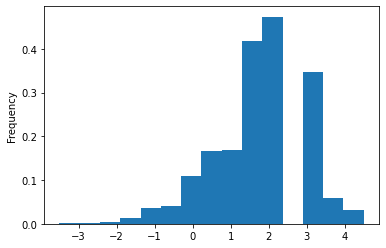

In [289]:
np.log(df["NetValue"]).plot.hist(density=True, bins = 15)

In [14]:
df['logValue'] = np.log(df['NetValue'])

<ipython-input-14-44b304ba703b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['logValue'] = np.log(df['NetValue'])


In [15]:
df = df.fillna(0)
df_for = df[df['PlayerType']=='Forward']
df_mid = df[df['PlayerType']=='Midfielder']
df_def = df[df['PlayerType']=='Defender']

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,877.0,25.669327,4.172111,17.000000,22.000000,25.000000,29.000000,38.00000
Min,877.0,1357.335234,858.888740,1.000000,670.000000,1293.000000,1971.000000,8248.00000
Goals,877.0,1.573546,2.768979,0.000000,0.000000,1.000000,2.000000,30.00000
Goals.1,877.0,0.101786,0.198511,0.000000,0.000000,0.030000,0.140000,3.60000
Asists,877.0,1.151653,1.592229,0.000000,0.000000,1.000000,2.000000,8.00000
Asists.1,877.0,0.079846,0.139918,0.000000,0.000000,0.030000,0.120000,1.76000
GoalAstPer90,877.0,0.181661,0.263858,0.000000,0.000000,0.110000,0.260000,3.60000
90s,877.0,15.080502,9.541452,0.000000,7.400000,14.400000,21.900000,91.60000
SCA,877.0,25.109464,24.226516,0.000000,6.000000,18.000000,37.000000,218.00000
SCA90,877.0,1.697856,1.347090,0.000000,0.650000,1.570000,2.430000,16.78500


Text(0.5, 1.0, 'Net Value')

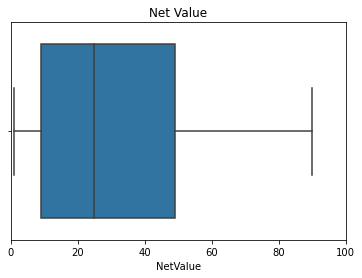

In [16]:
sns.boxplot(x=df_for["NetValue"])
plt.xlim([0,100])
plt.title("Net Value")

Text(0.5, 1.0, 'Goals')

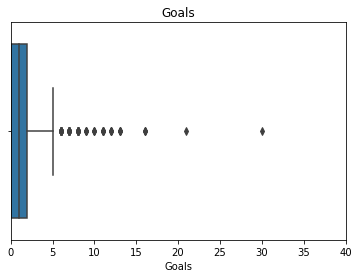

In [18]:
sns.boxplot(x=df["Goals"])
plt.xlim([0,40])
plt.title("Goals")

Text(0, 0.5, 'Net Value')

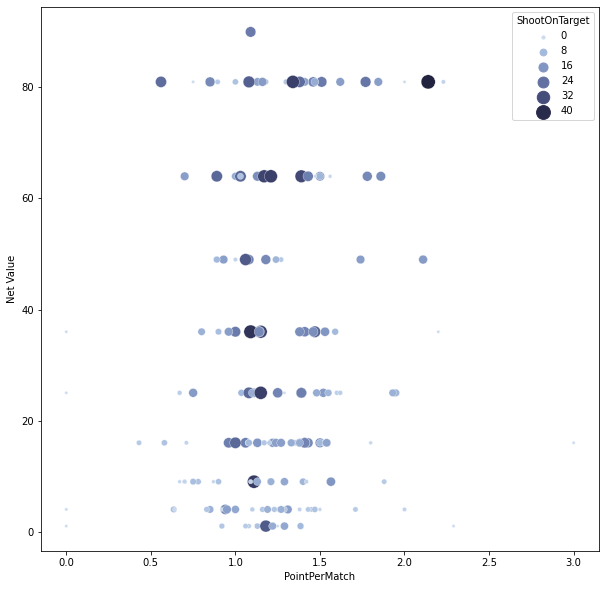

In [19]:
plt.figure(figsize=(10,10))
cmap = sns.cubehelix_palette(rot=-.1, as_cmap=True)
ax = sns.scatterplot(x="PointPerMatch", y="NetValue",  hue="ShootOnTarget", size ="ShootOnTarget",
                     palette=cmap, sizes=(10, 200), data=df_for)
plt.xlabel("PointPerMatch")
plt.ylabel("Net Value")

Text(0, 0.5, 'TouchPenArea')

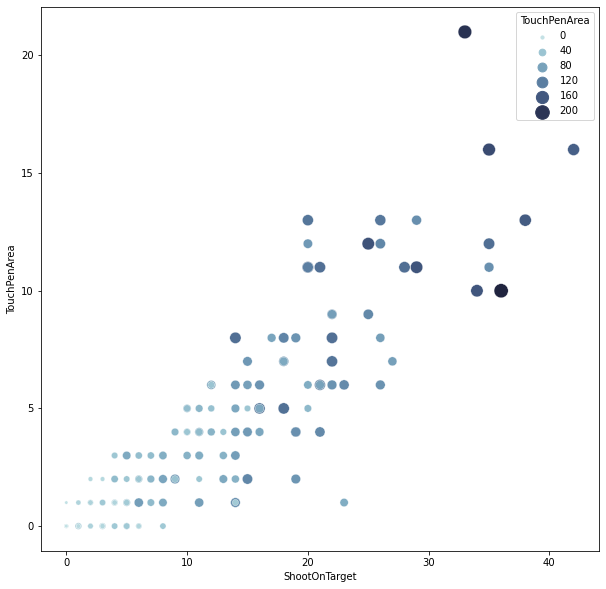

In [21]:
plt.figure(figsize=(10,10))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="ShootOnTarget", y="Goals",
                     hue="TouchPenArea", size ="TouchPenArea",
                     palette=cmap, sizes=(10, 200),
                     data=df_for)
plt.xlabel("ShootOnTarget")
plt.ylabel("TouchPenArea")

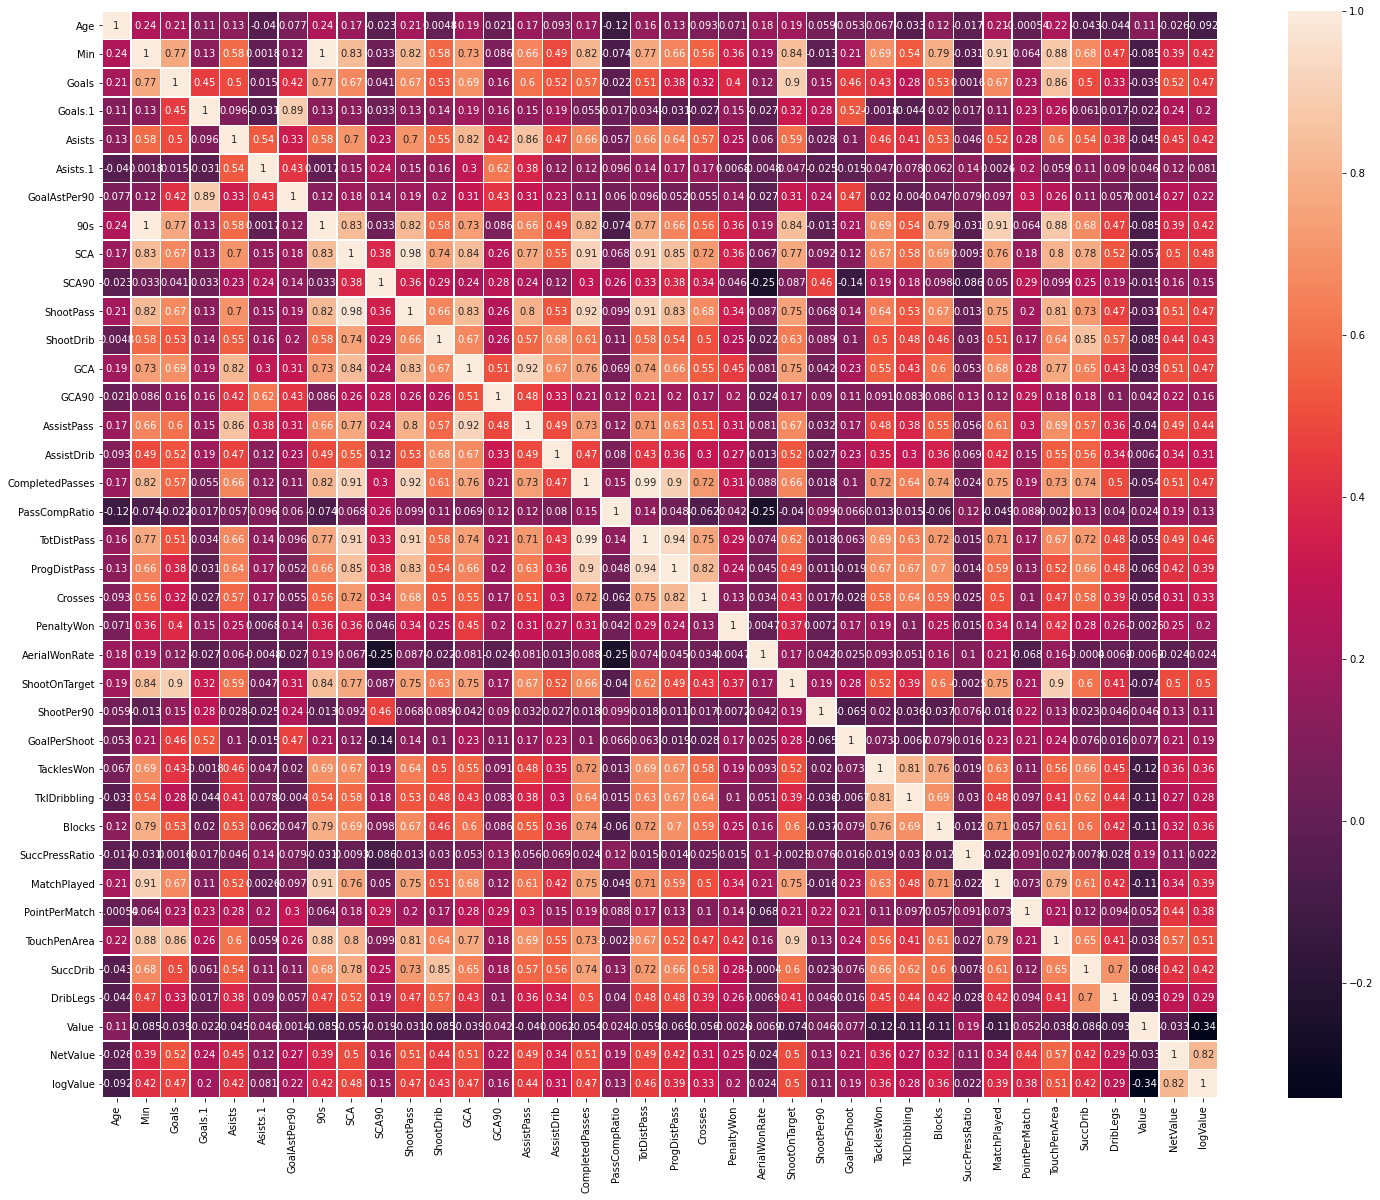

In [297]:
plt.figure(figsize=(25,20))
sns.heatmap(df_for.corr(),linewidths=.5, annot=True );
plt.yticks(rotation=360)
plt.show()

Checkpoint ! 

In [22]:
#df.to_csv('checkpoint.txt',sep=";")
'''

df = pd.read_csv('checkpoint.txt',sep=";")
df_for = df[df['PlayerType']=='Forward']
df_mid = df[df['PlayerType']=='Midfielder']
df_def = df[df['PlayerType']=='Defender']

'''

'\n\ndf = pd.read_csv(\'checkpoint.txt\',sep=";")\ndf_for = df[df[\'PlayerType\']==\'Forward\']\ndf_mid = df[df[\'PlayerType\']==\'Midfielder\']\ndf_def = df[df[\'PlayerType\']==\'Defender\']\n\n'

In [288]:
value_grouped_positions = df.groupby(['Comp','PlayerType'])['NetValue'].mean().reset_index().sort_values('NetValue',ascending = False)

grouped_bar = sns.catplot('PlayerType', 'NetValue', hue ='Comp', kind = 'bar', \
                          data = value_grouped_positions, aspect = 2)
plt.xlabel('Grouped Positions')
plt.ylabel('Player Value - Million €')
plt.title("Average Player Values by League")
grouped_bar.savefig('PlayerValuebyLeague.svg')


KeyError: 'Comp'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NetValue', ylabel='Density'>

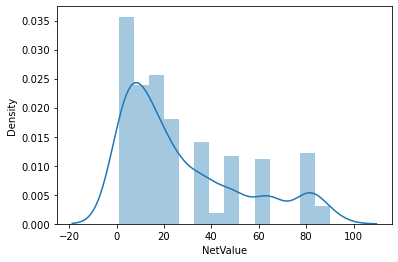

In [28]:
sns.distplot(df['NetValue'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Value', ylabel='Density'>

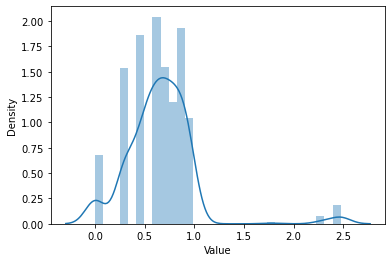

In [258]:
sns.distplot(np.log10(df[df['MatchPlayed']>10]['Value'] ) )

<AxesSubplot:xlabel='Comp', ylabel='NetValue'>

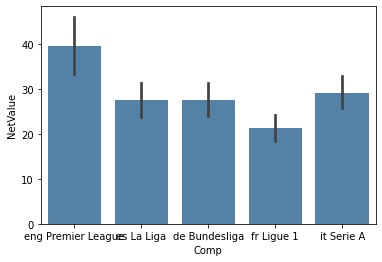

In [42]:
sns.barplot(x = 'Comp',y='NetValue',data=df, color='steelblue')

<AxesSubplot:xlabel='Age', ylabel='NetValue'>

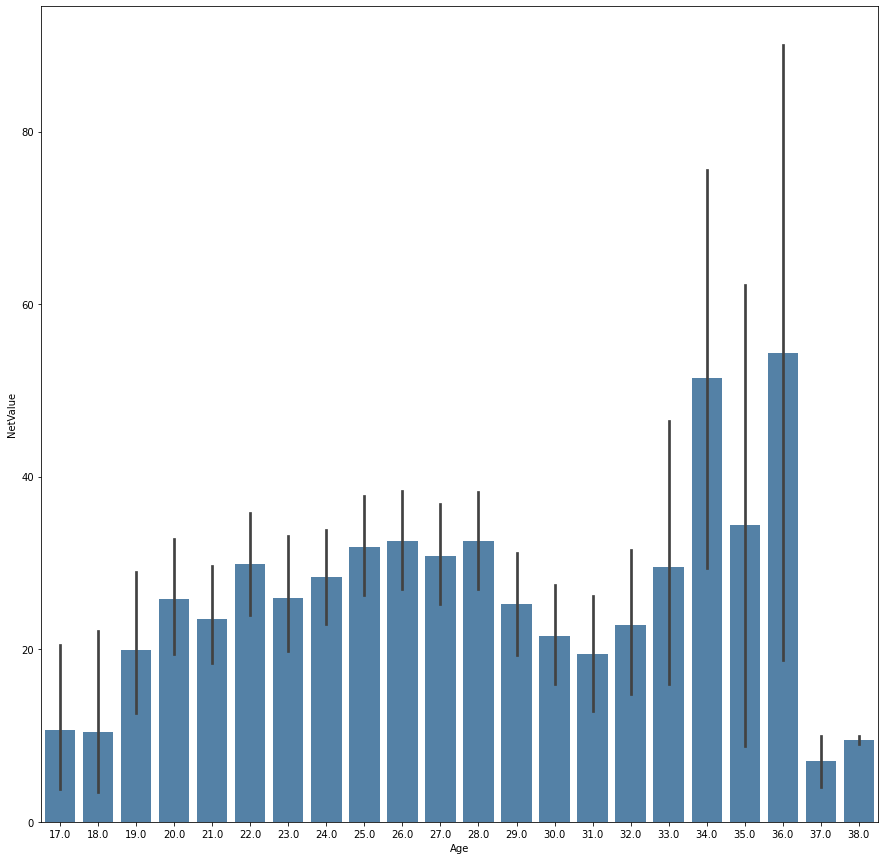

In [45]:
plt.figure(figsize=(15,15))
sns.barplot(x = 'Age',y='NetValue',data=df, color='steelblue')

In [315]:
df_for.columns

Index(['Name', 'Position', 'Age', 'Min', 'Goals', 'Goals.1', 'Asists',
       'Asists.1', 'GoalAstPer90', '90s', 'SCA', 'SCA90', 'ShootPass',
       'ShootDrib', 'GCA', 'GCA90', 'AssistPass', 'AssistDrib',
       'CompletedPasses', 'PassCompRatio', 'TotDistPass', 'ProgDistPass',
       'Crosses', 'PenaltyWon', 'AerialWonRate', 'ShootOnTarget', 'ShootPer90',
       'GoalPerShoot', 'TacklesWon', 'TklDribbling', 'Blocks',
       'SuccPressRatio', 'MatchPlayed', 'PointPerMatch', 'TouchPenArea',
       'SuccDrib', 'DribLegs', 'PlayerType', 'Value', 'Value2', 'Comp',
       'NetValue', 'logValue', 'Age2', 'Agelog'],
      dtype='object')

In [46]:
df.head(2)

,Name,Position,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,...,PointPerMatch,TouchPenArea,SuccDrib,DribLegs,PlayerType,Value,Value2,Comp,NetValue,logValue
PlayerName,,,,,,,,,,,,,,,,,,,,,
Aaron Connolly,Aaron Connolly,FW,19.0,1258,3,0.21,1,0.07,0.29,14.0,...,1.13,61.0,6.0,1.0,Forward,9.0,M,eng Premier League,81.0,4.394449
Aarón Escandell,Aarón Escandell,GK,23.0,270,0,0.00,0,0.00,0.00,3.0,...,1.00,0.0,0.0,0.0,Goalkeeper,1.0,M,es La Liga,1.0,0.000000


In [47]:
df.reset_index()

,PlayerName,Name,Position,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,...,PointPerMatch,TouchPenArea,SuccDrib,DribLegs,PlayerType,Value,Value2,Comp,NetValue,logValue
0,Aaron Connolly,Aaron Connolly,FW,19.0,1258,3,0.21,1,0.07,0.29,...,1.13,61.0,6.0,1.0,Forward,9.0,M,eng Premier League,81.0,4.394449
1,Aarón Escandell,Aarón Escandell,GK,23.0,270,0,0.00,0,0.00,0.00,...,1.00,0.0,0.0,0.0,Goalkeeper,1.0,M,es La Liga,1.0,0.000000
2,Aarón Martín,Aarón Martín,DF,22.0,1792,0,0.00,0,0.00,0.00,...,1.00,13.0,24.0,1.0,Defender,7.0,M,de Bundesliga,49.0,3.891820
3,Abdou Diallo,Abdou Diallo,DF,23.0,1201,0,0.00,1,0.07,0.07,...,2.44,8.0,17.0,1.0,Defender,9.0,M,fr Ligue 1,81.0,4.394449
4,Abdoulaye Bamba,Abdoulaye Bamba,DF,29.0,554,0,0.00,0,0.00,0.00,...,2.14,3.0,4.0,0.0,Defender,2.0,M,fr Ligue 1,4.0,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,Ádám Szalai,Ádám Szalai,FW,31.0,1147,1,0.08,1,0.08,0.16,...,1.22,83.0,14.0,1.0,Forward,1.0,M,de Bundesliga,1.0,0.000000
873,Ángel Montoro,Ángel Montoro,MF,31.0,973,2,0.18,5,0.46,0.65,...,1.60,13.0,6.0,2.0,Midfielder,2.0,M,es La Liga,4.0,1.386294
874,Édgar Méndez,Édgar Méndez,MF,29.0,864,1,0.10,0,0.00,0.10,...,0.94,17.0,12.0,1.0,Midfielder,6.0,M,es La Liga,36.0,3.583519
875,Óscar Plano,Óscar Plano,MF,28.0,2505,4,0.14,2,0.07,0.22,...,1.17,53.0,11.0,1.0,Midfielder,2.0,M,es La Liga,4.0,1.386294


In [49]:
df.columns = ['Name', 'Position', 'Age', 'Min', 'Goals', 'GoalsPer90', 'Asists',
       'AsistsPer90', 'GoalAstPer90', 'Played90s', 'SCA', 'SCA90', 'ShootPass',
       'ShootDrib', 'GCA', 'GCA90', 'AssistPass', 'AssistDrib',
       'CompletedPasses', 'PassCompRatio', 'TotDistPass', 'ProgDistPass',
       'Crosses', 'PenaltyWon', 'AerialWonRate', 'ShootOnTarget', 'ShootPer90',
       'GoalPerShoot', 'TacklesWon', 'TklDribbling', 'Blocks',
       'SuccPressRatio', 'MatchPlayed', 'PointPerMatch', 'TouchPenArea',
       'SuccDrib', 'DribLegs', 'PlayerType', 'Value', 'Value2', 'League', 'NetValue',
       'logValue']

In [50]:
df_for.corr()['NetValue']

Age                0.008508
Min                0.276417
Goals              0.306673
Goals.1            0.052041
Asists             0.282365
Asists.1           0.106978
GoalAstPer90       0.095408
90s                0.276343
SCA                0.332378
SCA90              0.081690
ShootPass          0.343165
ShootDrib          0.203512
GCA                0.330853
GCA90              0.143209
AssistPass         0.324595
AssistDrib         0.193363
CompletedPasses    0.312148
PassCompRatio      0.020348
TotDistPass        0.305943
ProgDistPass       0.228971
Crosses            0.145122
PenaltyWon         0.096175
AerialWonRate      0.062141
ShootOnTarget      0.360949
ShootPer90         0.052322
GoalPerShoot       0.078794
TacklesWon         0.068721
TklDribbling       0.024917
Blocks             0.222753
SuccPressRatio     0.152874
MatchPlayed        0.252543
PointPerMatch      0.163255
TouchPenArea       0.307381
SuccDrib           0.189667
DribLegs           0.105412
Value              0

In [51]:
df_for.corr()['logValue']

Age               -0.033890
Min                0.324508
Goals              0.294749
Goals.1           -0.019796
Asists             0.290801
Asists.1           0.065327
GoalAstPer90       0.011288
90s                0.324639
SCA                0.355545
SCA90              0.065967
ShootPass          0.356914
ShootDrib          0.246582
GCA                0.316866
GCA90              0.074217
AssistPass         0.302510
AssistDrib         0.209242
CompletedPasses    0.344448
PassCompRatio      0.006111
TotDistPass        0.336196
ProgDistPass       0.259345
Crosses            0.208403
PenaltyWon         0.054624
AerialWonRate      0.082058
ShootOnTarget      0.372241
ShootPer90         0.040033
GoalPerShoot       0.089891
TacklesWon         0.162658
TklDribbling       0.133546
Blocks             0.288011
SuccPressRatio     0.155926
MatchPlayed        0.291034
PointPerMatch      0.161815
TouchPenArea       0.326676
SuccDrib           0.246055
DribLegs           0.163445
Value              0

In [54]:
import patsy

In [56]:
y, X = patsy.dmatrices('logValue ~ Min + Goals +  Asists +   GoalAstPer90 +  SCA + SCA90 + ShootPass + ShootDrib + GCA + GCA90 + AssistPass + AssistDrib + CompletedPasses + PassCompRatio + TotDistPass + ProgDistPass + Crosses + PenaltyWon + AerialWonRate + ShootOnTarget + ShootPer90 + GoalPerShoot + TacklesWon + TklDribbling + Blocks + SuccPressRatio + MatchPlayed + PointPerMatch + TouchPenArea + SuccDrib + DribLegs', data=df, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logValue   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     4.442
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           4.87e-14
Time:                        13:35:03   Log-Likelihood:                -1360.0
No. Observations:                 877   AIC:                             2784.
Df Residuals:                     845   BIC:                             2937.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.5676      0.388      4.038      0.000       0.806       2.329
Min             -8.093e-05      0.000     -0.348      0.728      -0.001       0.000
Goals              -0.0662      0.037     -1.769      0.077      -0.140       0.007
Asists              0.1450      0.055      2.659      0.008       0.038       0.252
GoalAstPer90       -0.3867      0.242     -1.598      0.110      -0.862       0.088
SCA                -0.0168      0.010     -1.617      0.106      -0.037       0.004
SCA90               0.0952      0.060      1.580      0.115      -0.023       0.213
ShootPass           0.0134      0.014      0.993      0.321      -0.013       0.040
ShootDrib           0.0073      0.034      0.217      0.828      -0.059       0.073
GCA                 0.0776      0.055      1.404      0.161      -0.031       0.186
GCA90              -0.0760      0.288     -0.264      0.792      -0.642       0.490
AssistPass         -0.1116      0.062     -1.796      0.073      -0.234       0.010
AssistDrib         -0.0785      0.113     -0.694      0.488      -0.301       0.143
CompletedPasses     0.0018      0.001      2.497      0.013       0.000       0.003
PassCompRatio       0.0031      0.005      0.643      0.520      -0.006       0.013
TotDistPass     -7.605e-05   3.79e-05     -2.004      0.045      -0.000   -1.58e-06
ProgDistPass     6.729e-05   4.22e-05      1.593      0.111   -1.56e-05       0.000
Crosses            -0.0092      0.003     -2.958      0.003      -0.015      -0.003
PenaltyWon         -0.1273      0.103     -1.232      0.218      -0.330       0.075
AerialWonRate      -0.0022      0.002     -0.973      0.331      -0.007       0.002
ShootOnTarget       0.0629      0.019      3.331      0.001       0.026       0.100
ShootPer90         -0.0235      0.065     -0.360      0.719      -0.152       0.105
GoalPerShoot        0.8633      0.462      1.869      0.062      -0.043       1.770
TacklesWon         -0.0039      0.008     -0.483      0.629      -0.020       0.012
TklDribbling       -0.0065      0.012     -0.541      0.588      -0.030       0.017
Blocks           2.154e-05      0.005      0.004      0.996      -0.009       0.009
SuccPressRatio     -0.0012      0.004     -0.310      0.757      -0.009       0.006
MatchPlayed         0.0201      0.013      1.554      0.121      -0.005       0.045
PointPerMatch       0.2523      0.088      2.874      0.004       0.080       0.425
TouchPenArea       -0.0013      0.004     -0.338      0.736      -0.009       0.006
SuccDrib            0.0059      0.006      0.972      0.332      -0.006       0.018
DribLegs           -0.0372      0.038     -0.978      0.328      -0.112       0.037
==============================================================================
Omnibus:                       27.621   Durbin-Watson:          

In [57]:
y, X = patsy.dmatrices('NetValue ~ Min + Goals +  Asists +   GoalAstPer90 +  SCA + SCA90 + ShootPass + ShootDrib + GCA + GCA90 + AssistPass + AssistDrib + CompletedPasses + PassCompRatio + TotDistPass + ProgDistPass + Crosses + PenaltyWon + AerialWonRate + ShootOnTarget + ShootPer90 + GoalPerShoot + TacklesWon + TklDribbling + Blocks + SuccPressRatio + MatchPlayed + PointPerMatch + TouchPenArea + SuccDrib + DribLegs', data=df_for, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NetValue   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     1.945
Date:                Wed, 06 Jan 2021   Prob (F-statistic):            0.00446
Time:                        13:35:11   Log-Likelihood:                -843.37
No. Observations:                 186   AIC:                             1751.
Df Residuals:                     154   BIC:                             1854.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.5810     24.142      0.107      0.915     -45.112      50.274
Min                -0.0202      0.014     -1.453      0.148      -0.048       0.007
Goals              -0.6274      1.534     -0.409      0.683      -3.658       2.404
Asists              1.2282      2.314      0.531      0.596      -3.344       5.800
GoalAstPer90       -3.0045      6.574     -0.457      0.648     -15.991       9.982
SCA                -0.1447      0.575     -0.252      0.802      -1.281       0.991
SCA90               1.3306      2.489      0.535      0.594      -3.586       6.248
ShootPass           0.1621      0.672      0.241      0.810      -1.166       1.490
ShootDrib          -0.5276      1.311     -0.403      0.688      -3.117       2.062
GCA                 0.5823      2.040      0.285      0.776      -3.448       4.613
GCA90              -8.7240     12.906     -0.676      0.500     -34.220      16.772
AssistPass         -0.1881      2.608     -0.072      0.943      -5.339       4.963
AssistDrib          1.7511      3.893      0.450      0.653      -5.939       9.441
CompletedPasses     0.0508      0.099      0.514      0.608      -0.144       0.246
PassCompRatio      -0.1079      0.267     -0.404      0.687      -0.636       0.420
TotDistPass         0.0007      0.006      0.113      0.910      -0.011       0.013
ProgDistPass        0.0013      0.009      0.143      0.886      -0.016       0.019
Crosses            -0.1822      0.221     -0.824      0.411      -0.619       0.254
PenaltyWon         -2.1494      3.141     -0.684      0.495      -8.354       4.055
AerialWonRate      -0.0476      0.148     -0.322      0.748      -0.339       0.244
ShootOnTarget       1.7715      0.664      2.668      0.008       0.460       3.083
ShootPer90         -1.0133      2.281     -0.444      0.658      -5.520       3.493
GoalPerShoot        0.3522     30.449      0.012      0.991     -59.800      60.504
TacklesWon         -0.5832      0.565     -1.031      0.304      -1.700       0.534
TklDribbling       -1.3928      0.995     -1.400      0.164      -3.358       0.573
Blocks              0.4480      0.388      1.156      0.250      -0.318       1.214
SuccPressRatio      0.9113      0.332      2.741      0.007       0.254       1.568
MatchPlayed        -0.1521      0.499     -0.305      0.761      -1.139       0.834
PointPerMatch       7.1404      5.848      1.221      0.224      -4.411      18.692
TouchPenArea        0.0469      0.175      0.268      0.789      -0.300       0.393
SuccDrib            0.2555      0.296      0.863      0.389      -0.329       0.840
DribLegs           -0.1881      1.752     -0.107      0.915      -3.650       3.273
==============================================================================
Omnibus:                       17.950   Durbin-Watson:          

In [58]:
y, X = patsy.dmatrices('NetValue ~ Min + Goals +  Asists +   GoalAstPer90 +  SCA + SCA90 + ShootPass + ShootDrib + GCA + GCA90 + AssistPass + AssistDrib + CompletedPasses + PassCompRatio + TotDistPass + ProgDistPass + Crosses + PenaltyWon + AerialWonRate + ShootOnTarget + ShootPer90 + GoalPerShoot + TacklesWon + TklDribbling + Blocks + SuccPressRatio + MatchPlayed + PointPerMatch + TouchPenArea + SuccDrib + DribLegs', data=df_mid, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NetValue   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1.671
Date:                Wed, 06 Jan 2021   Prob (F-statistic):             0.0188
Time:                        13:35:20   Log-Likelihood:                -1150.0
No. Observations:                 253   AIC:                             2364.
Df Residuals:                     221   BIC:                             2477.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.6769     20.087      0.482      0.630     -29.909      49.262
Min                -0.0031      0.010     -0.295      0.768      -0.024       0.017
Goals              -0.8384      1.383     -0.606      0.545      -3.565       1.888
Asists              2.9540      2.202      1.341      0.181      -1.386       7.294
GoalAstPer90      -26.3783     19.400     -1.360      0.175     -64.611      11.854
SCA                -0.0435      0.360     -0.121      0.904      -0.753       0.666
SCA90               2.6152      2.074      1.261      0.209      -1.471       6.702
ShootPass          -0.4436      0.480     -0.923      0.357      -1.390       0.503
ShootDrib           0.1474      1.390      0.106      0.916      -2.592       2.887
GCA                 1.3133      2.097      0.626      0.532      -2.819       5.446
GCA90               3.9865     11.146      0.358      0.721     -17.980      25.953
AssistPass          0.2067      2.333      0.089      0.929      -4.391       4.805
AssistDrib         -5.5593      4.599     -1.209      0.228     -14.622       3.503
CompletedPasses     0.0263      0.038      0.694      0.488      -0.048       0.101
PassCompRatio       0.0119      0.216      0.055      0.956      -0.414       0.438
TotDistPass        -0.0013      0.002     -0.676      0.500      -0.005       0.002
ProgDistPass        0.0038      0.004      0.981      0.328      -0.004       0.012
Crosses            -0.2341      0.172     -1.365      0.174      -0.572       0.104
PenaltyWon         -2.6420      4.180     -0.632      0.528     -10.879       5.595
AerialWonRate      -0.0576      0.097     -0.597      0.551      -0.248       0.133
ShootOnTarget       0.7823      0.693      1.130      0.260      -0.582       2.147
ShootPer90         -0.1802      2.601     -0.069      0.945      -5.306       4.946
GoalPerShoot       10.1254     32.080      0.316      0.753     -53.096      73.347
TacklesWon         -0.1036      0.304     -0.340      0.734      -0.704       0.496
TklDribbling       -0.4038      0.480     -0.842      0.401      -1.349       0.542
Blocks              0.2793      0.226      1.237      0.218      -0.166       0.724
SuccPressRatio     -0.2002      0.241     -0.831      0.407      -0.675       0.274
MatchPlayed         0.4694      0.515      0.912      0.363      -0.545       1.484
PointPerMatch       7.3191      3.954      1.851      0.065      -0.472      15.111
TouchPenArea       -0.0047      0.176     -0.027      0.978      -0.351       0.342
SuccDrib            0.1817      0.214      0.847      0.398      -0.241       0.604
DribLegs           -2.0137      1.320     -1.525      0.129      -4.615       0.588
==============================================================================
Omnibus:                       20.771   Durbin-Watson:          

In [59]:
df_for.reset_index()

,PlayerName,Name,Position,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,...,PointPerMatch,TouchPenArea,SuccDrib,DribLegs,PlayerType,Value,Value2,Comp,NetValue,logValue
0,Aaron Connolly,Aaron Connolly,FW,19.0,1258,3,0.21,1,0.07,0.29,...,1.130,61.0,6.0,1.0,Forward,9.0,M,eng Premier League,81.0,4.394449
1,Adrien Hunou,Adrien Hunou,FW,25.0,1210,8,0.60,1,0.07,0.67,...,1.740,57.0,12.0,0.0,Forward,7.0,M,fr Ligue 1,49.0,3.891820
2,Ahmed Kutucu,Ahmed Kutucu,FW,19.0,679,3,0.40,2,0.27,0.66,...,0.920,21.0,21.0,1.0,Forward,1.0,M,de Bundesliga,1.0,0.000000
3,Alberto Cerri,Alberto Cerri,FW,23.0,664,2,0.29,0,0.00,0.29,...,0.635,41.0,12.0,0.0,Forward,2.0,M,it Serie A,4.0,1.386294
4,Alexander Isak,Alexander Isak,FW,19.0,1507,9,0.54,1,0.06,0.60,...,1.510,103.0,24.0,0.0,Forward,9.0,M,es La Liga,81.0,4.394449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Valère Germain,Valère Germain,FW,29.0,1350,2,0.13,4,0.27,0.40,...,1.880,49.0,4.0,1.0,Forward,3.0,M,fr Ligue 1,9.0,2.197225
182,Wout Weghorst,Wout Weghorst,FW,26.0,2739,16,0.53,3,0.10,0.62,...,1.340,173.0,28.0,0.0,Forward,9.0,M,de Bundesliga,81.0,4.394449
183,Yann Karamoh,Yann Karamoh,FW,21.0,573,1,0.16,1,0.16,0.31,...,0.430,19.0,15.0,2.0,Forward,4.0,M,it Serie A,16.0,2.772589
184,Zinedine Ferhat,Zinedine Ferhat,FW,26.0,2246,3,0.12,4,0.16,0.28,...,0.960,85.0,54.0,3.0,Forward,6.0,M,fr Ligue 1,36.0,3.583519


In [ ]:
'''df3 = df.reset_index()
df3.to_csv('StatswithFMValues.txt', sep=';', encoding='utf-8')'''

let's google result counts for each player. 
please check notebook : GoogleResultCount.ipynb

In [60]:
 df.fillna(0)

,Name,Position,Age,Min,Goals,GoalsPer90,Asists,AsistsPer90,GoalAstPer90,Played90s,...,PointPerMatch,TouchPenArea,SuccDrib,DribLegs,PlayerType,Value,Value2,League,NetValue,logValue
PlayerName,,,,,,,,,,,,,,,,,,,,,
Aaron Connolly,Aaron Connolly,FW,19.0,1258,3,0.21,1,0.07,0.29,14.0,...,1.13,61.0,6.0,1.0,Forward,9.0,M,eng Premier League,81.0,4.394449
Aarón Escandell,Aarón Escandell,GK,23.0,270,0,0.00,0,0.00,0.00,3.0,...,1.00,0.0,0.0,0.0,Goalkeeper,1.0,M,es La Liga,1.0,0.000000
Aarón Martín,Aarón Martín,DF,22.0,1792,0,0.00,0,0.00,0.00,19.9,...,1.00,13.0,24.0,1.0,Defender,7.0,M,de Bundesliga,49.0,3.891820
Abdou Diallo,Abdou Diallo,DF,23.0,1201,0,0.00,1,0.07,0.07,13.3,...,2.44,8.0,17.0,1.0,Defender,9.0,M,fr Ligue 1,81.0,4.394449
Abdoulaye Bamba,Abdoulaye Bamba,DF,29.0,554,0,0.00,0,0.00,0.00,6.2,...,2.14,3.0,4.0,0.0,Defender,2.0,M,fr Ligue 1,4.0,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ádám Szalai,Ádám Szalai,FW,31.0,1147,1,0.08,1,0.08,0.16,12.7,...,1.22,83.0,14.0,1.0,Forward,1.0,M,de Bundesliga,1.0,0.000000
Ángel Montoro,Ángel Montoro,MF,31.0,973,2,0.18,5,0.46,0.65,10.8,...,1.60,13.0,6.0,2.0,Midfielder,2.0,M,es La Liga,4.0,1.386294
Édgar Méndez,Édgar Méndez,MF,29.0,864,1,0.10,0,0.00,0.10,9.6,...,0.94,17.0,12.0,1.0,Midfielder,6.0,M,es La Liga,36.0,3.583519


In [61]:
df_for.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, Aaron Connolly to Ádám Szalai
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             186 non-null    object 
 1   Position         186 non-null    object 
 2   Age              186 non-null    float64
 3   Min              186 non-null    int64  
 4   Goals            186 non-null    int64  
 5   Goals.1          186 non-null    float64
 6   Asists           186 non-null    int64  
 7   Asists.1         186 non-null    float64
 8   GoalAstPer90     186 non-null    float64
 9   90s              186 non-null    float64
 10  SCA              186 non-null    float64
 11  SCA90            186 non-null    float64
 12  ShootPass        186 non-null    float64
 13  ShootDrib        186 non-null    float64
 14  GCA              186 non-null    float64
 15  GCA90            186 non-null    float64
 16  AssistPass       186 non-null    float64
 17  

In [62]:
df_for = df[df['PlayerType']=='Forward']
df_mid = df[df['PlayerType']=='Midfielder']
df_def = df[df['PlayerType']=='Defender']
df_for

,Name,Position,Age,Min,Goals,GoalsPer90,Asists,AsistsPer90,GoalAstPer90,Played90s,...,PointPerMatch,TouchPenArea,SuccDrib,DribLegs,PlayerType,Value,Value2,League,NetValue,logValue
PlayerName,,,,,,,,,,,,,,,,,,,,,
Aaron Connolly,Aaron Connolly,FW,19.0,1258,3,0.21,1,0.07,0.29,14.0,...,1.130,61.0,6.0,1.0,Forward,9.0,M,eng Premier League,81.0,4.394449
Adrien Hunou,Adrien Hunou,FW,25.0,1210,8,0.60,1,0.07,0.67,13.4,...,1.740,57.0,12.0,0.0,Forward,7.0,M,fr Ligue 1,49.0,3.891820
Ahmed Kutucu,Ahmed Kutucu,FW,19.0,679,3,0.40,2,0.27,0.66,7.5,...,0.920,21.0,21.0,1.0,Forward,1.0,M,de Bundesliga,1.0,0.000000
Alberto Cerri,Alberto Cerri,FW,23.0,664,2,0.29,0,0.00,0.29,7.4,...,0.635,41.0,12.0,0.0,Forward,2.0,M,it Serie A,4.0,1.386294
Alexander Isak,Alexander Isak,FW,19.0,1507,9,0.54,1,0.06,0.60,16.7,...,1.510,103.0,24.0,0.0,Forward,9.0,M,es La Liga,81.0,4.394449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Valère Germain,Valère Germain,FW,29.0,1350,2,0.13,4,0.27,0.40,15.0,...,1.880,49.0,4.0,1.0,Forward,3.0,M,fr Ligue 1,9.0,2.197225
Wout Weghorst,Wout Weghorst,FW,26.0,2739,16,0.53,3,0.10,0.62,30.4,...,1.340,173.0,28.0,0.0,Forward,9.0,M,de Bundesliga,81.0,4.394449
Yann Karamoh,Yann Karamoh,FW,21.0,573,1,0.16,1,0.16,0.31,6.4,...,0.430,19.0,15.0,2.0,Forward,4.0,M,it Serie A,16.0,2.772589


In [63]:
x_features = ['Age', 'Min', 'Goals', 'GoalsPer90', 'Asists',
       'AsistsPer90', 'GoalAstPer90', 'Played90s', 'SCA', 'SCA90', 'ShootPass',
       'ShootDrib', 'GCA', 'GCA90', 'AssistPass', 'AssistDrib',
       'CompletedPasses', 'PassCompRatio', 'TotDistPass', 'ProgDistPass',
       'Crosses', 'PenaltyWon', 'AerialWonRate', 'ShootOnTarget', 'ShootPer90',
       'GoalPerShoot', 'TacklesWon', 'TklDribbling', 'Blocks',
       'SuccPressRatio', 'MatchPlayed', 'PointPerMatch', 'TouchPenArea',
       'SuccDrib', 'DribLegs'] 

X = df_for.reindex(columns=x_features)

y = df_for.loc[:,"NetValue"]

model = sm.OLS(y, X, data=df_for)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               NetValue   R-squared (uncentered):                   0.703
Model:                            OLS   Adj. R-squared (uncentered):              0.634
Method:                 Least Squares   F-statistic:                              10.20
Date:                Wed, 06 Jan 2021   Prob (F-statistic):                    3.67e-25
Time:                        13:35:46   Log-Likelihood:                         -841.01
No. Observations:                 186   AIC:                                      1752.
Df Residuals:                     151   BIC:                                      1865.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                -0.6922      0.460     -1.504      0.135      -1.602       0.217
Min                 0.2621      0.799      0.328      0.743      -1.316       1.840
Goals              -0.5952      1.543     -0.386      0.700      -3.644       2.454
GoalsPer90        377.3973    514.795      0.733      0.465    -639.734    1394.529
Asists             -0.4066      2.752     -0.148      0.883      -5.845       5.031
AsistsPer90       394.7957    513.519      0.769      0.443    -619.815    1409.406
GoalAstPer90     -382.1537    514.950     -0.742      0.459   -1399.591     635.284
Played90s         -25.0816     71.704     -0.350      0.727    -166.754     116.591
SCA                -0.1490      0.578     -0.258      0.797      -1.291       0.993
SCA90               0.8349      2.484      0.336      0.737      -4.074       5.743
ShootPass           0.2220      0.685      0.324      0.746      -1.132       1.576
ShootDrib          -0.3632      1.320     -0.275      0.784      -2.972       2.245
GCA                 1.7748      2.206      0.805      0.422      -2.583       6.132
GCA90             -18.3630     16.375     -1.121      0.264     -50.718      13.992
AssistPass         -0.6504      2.657     -0.245      0.807      -5.900       4.599
AssistDrib          0.9998      3.911      0.256      0.799      -6.728       8.728
CompletedPasses     0.0273      0.097      0.282      0.778      -0.164       0.218
PassCompRatio       0.0661      0.169      0.392      0.696      -0.267       0.399
TotDistPass         0.0012      0.006      0.205      0.838      -0.011       0.013
ProgDistPass        0.0025      0.009      0.278      0.781      -0.015       0.020
Crosses            -0.1476      0.225     -0.657      0.512      -0.591       0.296
PenaltyWon         -2.8924      3.102     -0.932      0.353      -9.022       3.237
AerialWonRate      -0.0291      0.143     -0.204      0.839      -0.312       0.253
ShootOnTarget       1.6641      0.664      2.505      0.013       0.351       2.977
ShootPer90         -0.6210      2.277     -0.273      0.785      -5.120       3.878
GoalPerShoot        6.4768     30.888      0.210      0.834     -54.552      67.505
TacklesWon         -0.6410      0.564     -1.136      0.258      -1.756       0.474
TklDribbling       -1.4963      0.992     -1.508      0.134      -3.456       0.464
Blocks              0.4027      0.389      1.035      0.302      -0.366       1.171
SuccPressRatio      1.0096      0.330      3.057      0.003       0.357       1.662
MatchPlayed        -0.0686      0.517     -0.133      0.895      -1.089       0.952
PointPerMatch       9.9373      4.928      2.017      0.046       0.201      19.674
TouchPenArea        0.0434      0.176      0

In [64]:
x_features = ['Age', 'Min', 'Goals', 'GoalsPer90', 'Asists',
       'AsistsPer90', 'GoalAstPer90', 'Played90s', 'SCA', 'SCA90', 'ShootPass',
       'ShootDrib', 'GCA', 'GCA90', 'AssistPass', 'AssistDrib',
       'CompletedPasses', 'PassCompRatio', 'TotDistPass', 'ProgDistPass',
       'Crosses', 'PenaltyWon', 'AerialWonRate', 'ShootOnTarget', 'ShootPer90',
       'GoalPerShoot', 'TacklesWon', 'TklDribbling', 'Blocks',
       'SuccPressRatio', 'MatchPlayed', 'PointPerMatch', 'TouchPenArea',
       'SuccDrib', 'DribLegs'] 

X = df_mid.reindex(columns=x_features)

y = df_mid.loc[:,"NetValue"]

model = sm.OLS(y, X, data=df_for)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               NetValue   R-squared (uncentered):                   0.651
Model:                            OLS   Adj. R-squared (uncentered):              0.595
Method:                 Least Squares   F-statistic:                              11.62
Date:                Wed, 06 Jan 2021   Prob (F-statistic):                    2.33e-33
Time:                        13:35:52   Log-Likelihood:                         -1148.7
No. Observations:                 253   AIC:                                      2367.
Df Residuals:                     218   BIC:                                      2491.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                -0.0972      0.393     -0.247      0.805      -0.872       0.678
Min                 0.5408      0.593      0.912      0.363      -0.627       1.709
Goals              -0.3039      1.462     -0.208      0.836      -3.186       2.578
GoalsPer90        -14.2781    451.166     -0.032      0.975    -903.483     874.927
Asists              1.3276      2.701      0.492      0.624      -3.995       6.650
AsistsPer90        38.2674    450.895      0.085      0.932    -850.405     926.939
GoalAstPer90      -36.4458    451.679     -0.081      0.936    -926.663     853.771
Played90s         -48.9481     53.407     -0.917      0.360    -154.208      56.311
SCA                 0.0061      0.361      0.017      0.987      -0.706       0.719
SCA90               2.3861      2.093      1.140      0.256      -1.739       6.511
ShootPass          -0.4794      0.484     -0.990      0.323      -1.434       0.475
ShootDrib           0.1759      1.400      0.126      0.900      -2.583       2.935
GCA                 2.1127      2.237      0.944      0.346      -2.297       6.523
GCA90              -9.1251     14.828     -0.615      0.539     -38.350      20.100
AssistPass          0.2019      2.340      0.086      0.931      -4.410       4.814
AssistDrib         -6.1002      4.716     -1.293      0.197     -15.396       3.195
CompletedPasses     0.0202      0.038      0.536      0.593      -0.054       0.095
PassCompRatio       0.1285      0.141      0.912      0.363      -0.149       0.406
TotDistPass        -0.0010      0.002     -0.517      0.605      -0.005       0.003
ProgDistPass        0.0035      0.004      0.889      0.375      -0.004       0.011
Crosses            -0.2348      0.172     -1.361      0.175      -0.575       0.105
PenaltyWon         -3.2060      4.213     -0.761      0.447     -11.509       5.097
AerialWonRate      -0.0579      0.098     -0.588      0.557      -0.252       0.136
ShootOnTarget       0.6128      0.711      0.862      0.390      -0.788       2.014
ShootPer90          1.7421      2.883      0.604      0.546      -3.939       7.423
GoalPerShoot       33.0902     39.198      0.844      0.399     -44.165     110.346
TacklesWon         -0.1457      0.303     -0.480      0.632      -0.744       0.452
TklDribbling       -0.3857      0.481     -0.802      0.423      -1.333       0.562
Blocks              0.2942      0.228      1.290      0.199      -0.155       0.744
SuccPressRatio     -0.1169      0.187     -0.624      0.533      -0.486       0.252
MatchPlayed         0.4886      0.517      0.945      0.346      -0.531       1.508
PointPerMatch       7.2644      3.949      1.840      0.067      -0.518      15.047
TouchPenArea        0.0014      0.177      0

In [65]:
x_features = ['Age', 'Min', 'Goals', 'GoalsPer90', 'Asists',
       'AsistsPer90', 'GoalAstPer90', 'Played90s', 'SCA', 'SCA90', 'ShootPass',
       'ShootDrib', 'GCA', 'GCA90', 'AssistPass', 'AssistDrib',
       'CompletedPasses', 'PassCompRatio', 'TotDistPass', 'ProgDistPass',
       'Crosses', 'PenaltyWon', 'AerialWonRate', 'ShootOnTarget', 'ShootPer90',
       'GoalPerShoot', 'TacklesWon', 'TklDribbling', 'Blocks',
       'SuccPressRatio', 'MatchPlayed', 'PointPerMatch', 'TouchPenArea',
       'SuccDrib', 'DribLegs'] 

X = df_def.reindex(columns=x_features)

y = df_def.loc[:,"NetValue"]

model = sm.OLS(y, X, data=df_for)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               NetValue   R-squared (uncentered):                   0.574
Model:                            OLS   Adj. R-squared (uncentered):              0.529
Method:                 Least Squares   F-statistic:                              12.78
Date:                Wed, 06 Jan 2021   Prob (F-statistic):                    4.09e-43
Time:                        13:35:59   Log-Likelihood:                         -1662.3
No. Observations:                 367   AIC:                                      3395.
Df Residuals:                     332   BIC:                                      3531.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                 0.2220      0.321      0.691      0.490      -0.410       0.854
Min                -0.7552      0.513     -1.471      0.142      -1.765       0.255
Goals               0.5638      2.116      0.266      0.790      -3.599       4.726
GoalsPer90       -489.5300    464.088     -1.055      0.292   -1402.454     423.394
Asists              2.4857      2.892      0.859      0.391      -3.204       8.175
AsistsPer90      -444.4787    465.314     -0.955      0.340   -1359.814     470.857
GoalAstPer90      444.6897    461.833      0.963      0.336    -463.799    1353.178
Played90s          66.2596     46.161      1.435      0.152     -24.546     157.065
SCA                -0.5309      0.431     -1.233      0.218      -1.378       0.316
SCA90               0.4940      3.282      0.151      0.880      -5.963       6.951
ShootPass           0.3121      0.556      0.561      0.575      -0.782       1.407
ShootDrib           0.5623      1.594      0.353      0.724      -2.573       3.698
GCA                 3.1282      2.709      1.155      0.249      -2.200       8.456
GCA90              12.0434     23.488      0.513      0.608     -34.161      58.248
AssistPass         -5.1248      2.646     -1.937      0.054     -10.330       0.081
AssistDrib         -0.7212      5.851     -0.123      0.902     -12.231      10.788
CompletedPasses     0.0402      0.021      1.919      0.056      -0.001       0.081
PassCompRatio       0.0249      0.126      0.198      0.843      -0.222       0.272
TotDistPass        -0.0009      0.001     -0.889      0.375      -0.003       0.001
ProgDistPass        0.0008      0.002      0.459      0.647      -0.003       0.004
Crosses            -0.0816      0.119     -0.687      0.492      -0.315       0.152
PenaltyWon          1.2819      6.683      0.192      0.848     -11.865      14.429
AerialWonRate   -8.108e-05      0.083     -0.001      0.999      -0.162       0.162
ShootOnTarget       0.2392      1.020      0.234      0.815      -1.768       2.246
ShootPer90          1.8781      4.968      0.378      0.706      -7.895      11.651
GoalPerShoot       25.1628     13.572      1.854      0.065      -1.535      51.861
TacklesWon         -0.2047      0.276     -0.741      0.459      -0.748       0.339
TklDribbling        0.1647      0.355      0.464      0.643      -0.533       0.863
Blocks              0.2306      0.155      1.488      0.138      -0.074       0.536
SuccPressRatio     -0.0988      0.206     -0.478      0.633      -0.505       0.307
MatchPlayed         0.6618      0.607      1.091      0.276      -0.532       1.855
PointPerMatch       6.8265      2.829      2.413      0.016       1.261      12.392
TouchPenArea        0.1022      0.200      0

In [ ]:
# now i just re-run ols for def- mid and for with log of the value 

In [66]:
x_features = ['Age', 'Min', 'Goals', 'GoalsPer90', 'Asists',
       'AsistsPer90', 'GoalAstPer90', 'Played90s', 'SCA', 'SCA90', 'ShootPass',
       'ShootDrib', 'GCA', 'GCA90', 'AssistPass', 'AssistDrib',
       'CompletedPasses', 'PassCompRatio', 'TotDistPass', 'ProgDistPass',
       'Crosses', 'PenaltyWon', 'AerialWonRate', 'ShootOnTarget', 'ShootPer90',
       'GoalPerShoot', 'TacklesWon', 'TklDribbling', 'Blocks',
       'SuccPressRatio', 'MatchPlayed', 'PointPerMatch', 'TouchPenArea',
       'SuccDrib', 'DribLegs'] 

X = df_for.reindex(columns=x_features)

y = df_for.loc[:,"logValue"]

model = sm.OLS(y, X, data=df_for)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               logValue   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              36.23
Date:                Wed, 06 Jan 2021   Prob (F-statistic):                    3.69e-57
Time:                        13:36:03   Log-Likelihood:                         -268.41
No. Observations:                 186   AIC:                                      606.8
Df Residuals:                     151   BIC:                                      719.7
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                -0.0280      0.021     -1.320      0.189      -0.070       0.014
Min                -0.0091      0.037     -0.248      0.805      -0.082       0.064
Goals              -0.0783      0.071     -1.103      0.272      -0.219       0.062
GoalsPer90          6.8793     23.695      0.290      0.772     -39.937      53.696
Asists             -0.0103      0.127     -0.081      0.935      -0.261       0.240
AsistsPer90         7.7754     23.636      0.329      0.743     -38.925      54.476
GoalAstPer90       -7.3897     23.702     -0.312      0.756     -54.220      39.441
Played90s           0.7983      3.300      0.242      0.809      -5.723       7.319
SCA                 0.0021      0.027      0.078      0.938      -0.050       0.055
SCA90               0.0323      0.114      0.282      0.778      -0.194       0.258
ShootPass           0.0055      0.032      0.175      0.861      -0.057       0.068
ShootDrib           0.0028      0.061      0.046      0.963      -0.117       0.123
GCA                 0.0765      0.102      0.753      0.453      -0.124       0.277
GCA90              -1.2344      0.754     -1.638      0.104      -2.724       0.255
AssistPass         -0.0321      0.122     -0.263      0.793      -0.274       0.209
AssistDrib          0.0332      0.180      0.184      0.854      -0.322       0.389
CompletedPasses    -0.0018      0.004     -0.400      0.690      -0.011       0.007
PassCompRatio       0.0147      0.008      1.894      0.060      -0.001       0.030
TotDistPass         0.0002      0.000      0.685      0.494      -0.000       0.001
ProgDistPass       -0.0001      0.000     -0.346      0.730      -0.001       0.001
Crosses            -0.0029      0.010     -0.281      0.779      -0.023       0.018
PenaltyWon         -0.2123      0.143     -1.487      0.139      -0.494       0.070
AerialWonRate       0.0031      0.007      0.474      0.636      -0.010       0.016
ShootOnTarget       0.0692      0.031      2.262      0.025       0.009       0.130
ShootPer90         -0.0116      0.105     -0.110      0.912      -0.219       0.196
GoalPerShoot        1.6455      1.422      1.157      0.249      -1.164       4.455
TacklesWon         -0.0285      0.026     -1.098      0.274      -0.080       0.023
TklDribbling       -0.0364      0.046     -0.797      0.427      -0.127       0.054
Blocks              0.0208      0.018      1.164      0.246      -0.015       0.056
SuccPressRatio      0.0491      0.015      3.232      0.002       0.019       0.079
MatchPlayed        -0.0064      0.024     -0.267      0.790      -0.053       0.041
PointPerMatch       0.6975      0.227      3.075      0.002       0.249       1.146
TouchPenArea        0.0014      0.008      0

In [67]:
x_features = ['Age', 'Min', 'Goals', 'GoalsPer90', 'Asists',
       'AsistsPer90', 'GoalAstPer90', 'Played90s', 'SCA', 'SCA90', 'ShootPass',
       'ShootDrib', 'GCA', 'GCA90', 'AssistPass', 'AssistDrib',
       'CompletedPasses', 'PassCompRatio', 'TotDistPass', 'ProgDistPass',
       'Crosses', 'PenaltyWon', 'AerialWonRate', 'ShootOnTarget', 'ShootPer90',
       'GoalPerShoot', 'TacklesWon', 'TklDribbling', 'Blocks',
       'SuccPressRatio', 'MatchPlayed', 'PointPerMatch', 'TouchPenArea',
       'SuccDrib', 'DribLegs'] 

X = df_mid.reindex(columns=x_features)

y = df_mid.loc[:,"logValue"]

model = sm.OLS(y, X, data=df_for)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               logValue   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              48.78
Date:                Wed, 06 Jan 2021   Prob (F-statistic):                    1.82e-84
Time:                        13:36:08   Log-Likelihood:                         -367.93
No. Observations:                 253   AIC:                                      805.9
Df Residuals:                     218   BIC:                                      929.5
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                -0.0081      0.018     -0.452      0.652      -0.044       0.027
Min                 0.0242      0.027      0.894      0.372      -0.029       0.078
Goals              -0.0512      0.067     -0.767      0.444      -0.183       0.080
GoalsPer90         -0.7407     20.607     -0.036      0.971     -41.355      39.874
Asists              0.1138      0.123      0.923      0.357      -0.129       0.357
AsistsPer90         0.7326     20.595      0.036      0.972     -39.858      41.323
GoalAstPer90       -0.6514     20.630     -0.032      0.975     -41.312      40.009
Played90s          -2.1493      2.439     -0.881      0.379      -6.957       2.658
SCA                 0.0031      0.017      0.188      0.851      -0.029       0.036
SCA90               0.1606      0.096      1.680      0.094      -0.028       0.349
ShootPass          -0.0234      0.022     -1.060      0.290      -0.067       0.020
ShootDrib          -0.0226      0.064     -0.354      0.724      -0.149       0.103
GCA                -0.0356      0.102     -0.349      0.728      -0.237       0.166
GCA90              -0.2214      0.677     -0.327      0.744      -1.556       1.113
AssistPass          0.0880      0.107      0.824      0.411      -0.123       0.299
AssistDrib         -0.0164      0.215     -0.076      0.939      -0.441       0.408
CompletedPasses     0.0008      0.002      0.489      0.625      -0.003       0.004
PassCompRatio       0.0177      0.006      2.743      0.007       0.005       0.030
TotDistPass     -6.876e-05   8.82e-05     -0.780      0.436      -0.000       0.000
ProgDistPass        0.0002      0.000      0.951      0.342      -0.000       0.001
Crosses            -0.0063      0.008     -0.804      0.422      -0.022       0.009
PenaltyWon          0.0146      0.192      0.076      0.940      -0.365       0.394
AerialWonRate      -0.0026      0.004     -0.579      0.563      -0.011       0.006
ShootOnTarget       0.0135      0.032      0.416      0.678      -0.050       0.078
ShootPer90          0.1366      0.132      1.038      0.301      -0.123       0.396
GoalPerShoot        1.3006      1.790      0.726      0.468      -2.228       4.829
TacklesWon          0.0042      0.014      0.306      0.760      -0.023       0.032
TklDribbling       -0.0326      0.022     -1.486      0.139      -0.076       0.011
Blocks              0.0026      0.010      0.252      0.801      -0.018       0.023
SuccPressRatio      0.0032      0.009      0.376      0.707      -0.014       0.020
MatchPlayed         0.0252      0.024      1.068      0.287      -0.021       0.072
PointPerMatch       0.4308      0.180      2.389      0.018       0.075       0.786
TouchPenArea        0.0006      0.008      0

In [68]:
x_features = ['Age', 'Min', 'Goals', 'GoalsPer90', 'Asists',
       'AsistsPer90', 'GoalAstPer90', 'Played90s', 'SCA', 'SCA90', 'ShootPass',
       'ShootDrib', 'GCA', 'GCA90', 'AssistPass', 'AssistDrib',
       'CompletedPasses', 'PassCompRatio', 'TotDistPass', 'ProgDistPass',
       'Crosses', 'PenaltyWon', 'AerialWonRate', 'ShootOnTarget', 'ShootPer90',
       'GoalPerShoot', 'TacklesWon', 'TklDribbling', 'Blocks',
       'SuccPressRatio', 'MatchPlayed', 'PointPerMatch', 'TouchPenArea',
       'SuccDrib', 'DribLegs'] 

X = df_def.reindex(columns=x_features)

y = df_def.loc[:,"logValue"]

model = sm.OLS(y, X, data=df_for)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               logValue   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.832
Method:                 Least Squares   F-statistic:                              53.03
Date:                Wed, 06 Jan 2021   Prob (F-statistic):                   9.02e-115
Time:                        13:36:16   Log-Likelihood:                         -563.08
No. Observations:                 367   AIC:                                      1196.
Df Residuals:                     332   BIC:                                      1333.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                 0.0011      0.016      0.071      0.944      -0.030       0.033
Min                -0.0400      0.026     -1.558      0.120      -0.091       0.011
Goals              -0.0793      0.106     -0.749      0.454      -0.288       0.129
GoalsPer90          5.5102     23.220      0.237      0.813     -40.167      51.188
Asists              0.2565      0.145      1.773      0.077      -0.028       0.541
AsistsPer90         4.5898     23.282      0.197      0.844     -41.208      50.388
GoalAstPer90       -6.4611     23.108     -0.280      0.780     -51.917      38.994
Played90s           3.5471      2.310      1.536      0.126      -0.996       8.091
SCA                -0.0476      0.022     -2.210      0.028      -0.090      -0.005
SCA90               0.1552      0.164      0.945      0.345      -0.168       0.478
ShootPass           0.0276      0.028      0.991      0.322      -0.027       0.082
ShootDrib           0.0398      0.080      0.500      0.618      -0.117       0.197
GCA                 0.2365      0.136      1.745      0.082      -0.030       0.503
GCA90               1.0162      1.175      0.865      0.388      -1.296       3.328
AssistPass         -0.3859      0.132     -2.914      0.004      -0.646      -0.125
AssistDrib         -0.1502      0.293     -0.513      0.608      -0.726       0.426
CompletedPasses     0.0019      0.001      1.781      0.076      -0.000       0.004
PassCompRatio       0.0130      0.006      2.068      0.039       0.001       0.025
TotDistPass     -8.121e-05   5.17e-05     -1.570      0.117      -0.000    2.05e-05
ProgDistPass        0.0001   9.01e-05      1.254      0.211   -6.43e-05       0.000
Crosses            -0.0053      0.006     -0.885      0.377      -0.017       0.006
PenaltyWon         -0.3126      0.334     -0.935      0.350      -0.970       0.345
AerialWonRate       0.0014      0.004      0.330      0.742      -0.007       0.009
ShootOnTarget       0.0573      0.051      1.122      0.263      -0.043       0.158
ShootPer90          0.0777      0.249      0.313      0.755      -0.411       0.567
GoalPerShoot        1.4525      0.679      2.139      0.033       0.117       2.788
TacklesWon         -0.0159      0.014     -1.153      0.250      -0.043       0.011
TklDribbling        0.0133      0.018      0.747      0.455      -0.022       0.048
Blocks              0.0032      0.008      0.413      0.680      -0.012       0.018
SuccPressRatio     -0.0002      0.010     -0.020      0.984      -0.021       0.020
MatchPlayed         0.0569      0.030      1.874      0.062      -0.003       0.117
PointPerMatch       0.3953      0.142      2.793      0.006       0.117       0.674
TouchPenArea       -0.0007      0.010     -0

Text(0, 0.5, 'Net Value - Million € ')

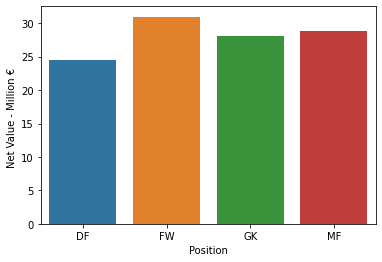

In [73]:
PosValue = df.groupby(['Position'])['NetValue'].mean().reset_index()
sns.barplot(x = 'Position',y='NetValue',data=PosValue)     
plt.ylabel('Net Value - Million € ')

<AxesSubplot:xlabel='Position', ylabel='NetValue'>

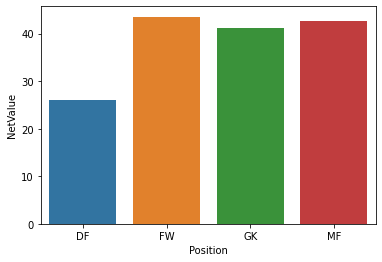

In [70]:
PosValue = df[df['MatchPlayed']>30].groupby(['Position'])['NetValue'].mean().reset_index()
sns.barplot(x = 'Position',y='NetValue',data=PosValue)     

In [74]:
x_features = ['Age', 'Min', 'Goals', 'GoalsPer90', 'Asists',
       'AsistsPer90', 'GoalAstPer90', 'Played90s', 'SCA', 'SCA90', 'ShootPass',
       'ShootDrib', 'GCA', 'GCA90', 'AssistPass', 'AssistDrib',
       'CompletedPasses', 'PassCompRatio', 'TotDistPass', 'ProgDistPass',
       'Crosses', 'PenaltyWon', 'AerialWonRate', 'ShootOnTarget', 'ShootPer90',
       'GoalPerShoot', 'TacklesWon', 'TklDribbling', 'Blocks',
       'SuccPressRatio', 'MatchPlayed', 'PointPerMatch', 'TouchPenArea',
       'SuccDrib', 'DribLegs'] 

X = df_for[df_for['MatchPlayed']>25].reindex(columns=x_features)

y = df_for[df_for['MatchPlayed']>25].loc[:,"logValue"]

model = sm.OLS(y, X, data=df_for)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               logValue   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              23.78
Date:                Wed, 06 Jan 2021   Prob (F-statistic):                    5.83e-15
Time:                        13:37:26   Log-Likelihood:                         -67.804
No. Observations:                  67   AIC:                                      205.6
Df Residuals:                      32   BIC:                                      282.8
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                -0.1190      0.038     -3.100      0.004      -0.197      -0.041
Min                -0.0737      0.081     -0.904      0.373      -0.240       0.092
Goals              -0.3979      0.201     -1.981      0.056      -0.807       0.011
GoalsPer90         -3.8684     33.418     -0.116      0.909     -71.938      64.201
Asists             -0.1125      0.558     -0.202      0.841      -1.248       1.023
AsistsPer90       -12.2732     35.415     -0.347      0.731     -84.412      59.866
GoalAstPer90       14.4602     34.595      0.418      0.679     -56.008      84.929
Played90s           6.7420      7.328      0.920      0.364      -8.184      21.668
SCA                -0.0377      0.035     -1.085      0.286      -0.109       0.033
SCA90               0.7117      0.578      1.232      0.227      -0.465       1.888
ShootPass           0.0234      0.039      0.606      0.549      -0.055       0.102
ShootDrib           0.0131      0.078      0.168      0.868      -0.145       0.171
GCA                 0.3148      0.260      1.212      0.235      -0.214       0.844
GCA90              -5.3830      5.345     -1.007      0.321     -16.270       5.504
AssistPass         -0.0363      0.151     -0.240      0.812      -0.344       0.271
AssistDrib         -0.2324      0.249     -0.932      0.358      -0.740       0.276
CompletedPasses     0.0011      0.006      0.181      0.858      -0.011       0.013
PassCompRatio       0.0388      0.029      1.335      0.191      -0.020       0.098
TotDistPass        -0.0001      0.000     -0.381      0.706      -0.001       0.001
ProgDistPass        0.0004      0.001      0.692      0.494      -0.001       0.002
Crosses             0.0007      0.016      0.040      0.968      -0.032       0.034
PenaltyWon         -0.4838      0.190     -2.549      0.016      -0.870      -0.097
AerialWonRate       0.0053      0.014      0.374      0.711      -0.023       0.034
ShootOnTarget       0.0858      0.039      2.179      0.037       0.006       0.166
ShootPer90         -0.6408      0.552     -1.160      0.255      -1.766       0.485
GoalPerShoot       -6.3415      7.546     -0.840      0.407     -21.711       9.028
TacklesWon          0.0273      0.039      0.708      0.484      -0.051       0.106
TklDribbling       -0.1643      0.069     -2.381      0.023      -0.305      -0.024
Blocks             -0.0001      0.025     -0.005      0.996      -0.051       0.051
SuccPressRatio      0.0338      0.051      0.666      0.510      -0.070       0.137
MatchPlayed         0.0278      0.051      0.549      0.587      -0.075       0.131
PointPerMatch      -0.0779      0.685     -0.114      0.910      -1.473       1.317
TouchPenArea       -0.0047      0.011     -0

In [75]:
df['Age'].max()

38.0

In [80]:
df['AgeNorm']= (40-df['Age'])**2

In [92]:
x_features = [  'Goals', 'GoalsPer90', 'Asists', 'AgeNorm',
        'GoalAstPer90', 'Played90s', 'SCA', 'SCA90', 'ShootPass',
       'ShootDrib', 'GCA', 'GCA90', 'AssistPass', 'AssistDrib',
       'CompletedPasses', 'PassCompRatio', 'TotDistPass', 'ProgDistPass',
       'ShootOnTarget',       'GoalPerShoot',       'SuccPressRatio', 'MatchPlayed', 
              'PointPerMatch', 'TouchPenArea',       'SuccDrib', 'DribLegs'] 

X = df[df['MatchPlayed']>25].reindex(columns=x_features)

y = df[df['MatchPlayed']>25].loc[:,"logValue"]

model = sm.OLS(y, X, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               logValue   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              84.22
Date:                Wed, 06 Jan 2021   Prob (F-statistic):                   9.71e-103
Time:                        13:41:30   Log-Likelihood:                         -366.89
No. Observations:                 257   AIC:                                      785.8
Df Residuals:                     231   BIC:                                      878.1
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Goals              -0.1152      0.072     -1.604      0.110      -0.257       0.026
GoalsPer90         -0.7139      5.160     -0.138      0.890     -10.881       9.453
Asists              0.0257      0.228      0.113      0.910      -0.424       0.476
AgeNorm             0.0024      0.001      3.402      0.001       0.001       0.004
GoalAstPer90        1.7050      5.119      0.333      0.739      -8.380      11.790
Played90s           0.0284      0.031      0.911      0.363      -0.033       0.090
SCA                -0.0178      0.012     -1.436      0.152      -0.042       0.007
SCA90               0.0485      0.080      0.604      0.546      -0.110       0.207
ShootPass           0.0144      0.016      0.883      0.378      -0.018       0.047
ShootDrib           0.0097      0.043      0.228      0.820      -0.074       0.093
GCA                 0.0869      0.135      0.642      0.521      -0.180       0.354
GCA90              -1.1846      2.835     -0.418      0.676      -6.770       4.401
AssistPass         -0.0015      0.074     -0.021      0.983      -0.147       0.144
AssistDrib         -0.0999      0.130     -0.768      0.443      -0.356       0.156
CompletedPasses    -0.0012      0.001     -1.358      0.176      -0.003       0.001
PassCompRatio       0.0145      0.009      1.669      0.096      -0.003       0.032
TotDistPass      4.336e-05   4.39e-05      0.987      0.325   -4.32e-05       0.000
ProgDistPass    -6.129e-07    4.8e-05     -0.013      0.990   -9.52e-05     9.4e-05
ShootOnTarget       0.0608      0.023      2.654      0.009       0.016       0.106
GoalPerShoot        2.1169      1.424      1.487      0.138      -0.688       4.922
SuccPressRatio     -0.0055      0.010     -0.521      0.603      -0.026       0.015
MatchPlayed         0.0156      0.023      0.695      0.488      -0.029       0.060
PointPerMatch       0.1580      0.274      0.577      0.564      -0.381       0.697
TouchPenArea       -0.0035      0.004     -0.851      0.396      -0.012       0.005
SuccDrib            0.0022      0.008      0.273      0.785      -0.014       0.018
DribLegs           -0.0390      0.049     -0.794      0.428      -0.136       0.058
==============================================================================
Omnibus:                       20.789   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.493
Skew:                          -0.726   Prob(JB):                     7.92e-06
Kurtosis:                       3.290   Cond. No.                     2.20e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model 

let's make league as dummies 

In [93]:
df['Succes'] = df['MatchPlayed'] * df['PointPerMatch']

In [96]:
df = pd.get_dummies(df,columns=['League'])

In [97]:
df_for = df[df['PlayerType']=='Forward']
df_mid = df[df['PlayerType']=='Midfielder']
df_def = df[df['PlayerType']=='Defender']

In [98]:
df_for.columns

Index(['Name', 'Position', 'Age', 'Min', 'Goals', 'GoalsPer90', 'Asists',
       'AsistsPer90', 'GoalAstPer90', 'Played90s', 'SCA', 'SCA90', 'ShootPass',
       'ShootDrib', 'GCA', 'GCA90', 'AssistPass', 'AssistDrib',
       'CompletedPasses', 'PassCompRatio', 'TotDistPass', 'ProgDistPass',
       'Crosses', 'PenaltyWon', 'AerialWonRate', 'ShootOnTarget', 'ShootPer90',
       'GoalPerShoot', 'TacklesWon', 'TklDribbling', 'Blocks',
       'SuccPressRatio', 'MatchPlayed', 'PointPerMatch', 'TouchPenArea',
       'SuccDrib', 'DribLegs', 'PlayerType', 'Value', 'Value2', 'NetValue',
       'logValue', 'AgeNorm', 'Succes', 'League_de Bundesliga',
       'League_eng Premier League', 'League_es La Liga', 'League_fr Ligue 1',
       'League_it Serie A'],
      dtype='object')

In [104]:
x_features = ['AgeNorm',   'Goals', 'GoalsPer90', 'Asists',
        'GoalAstPer90', 'Played90s', 'SCA', 'SCA90', 'ShootPass',
       'ShootDrib', 'GCA', 'GCA90', 'AssistPass', 'AssistDrib',
       'CompletedPasses', 'PassCompRatio', 'TotDistPass', 'ProgDistPass',
       'ShootOnTarget',       'GoalPerShoot',       'SuccPressRatio', 'MatchPlayed', 
              'PointPerMatch', 'TouchPenArea',       'SuccDrib', 'DribLegs' ,'League_de Bundesliga', 'League_eng Premier League',
       'League_es La Liga', 'League_fr Ligue 1', 'League_it Serie A'   , 'Succes'           ] 

X = df[df['MatchPlayed']>20].reindex(columns=x_features)

y = df[df['MatchPlayed']>20].loc[:,"logValue"]

model = sm.OLS(y, X, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logValue   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     2.838
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           1.55e-06
Time:                        13:44:14   Log-Likelihood:                -616.53
No. Observations:                 432   AIC:                             1297.
Df Residuals:                     400   BIC:                             1427.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
AgeNorm                       0.0022      0.001      3.964      0.000       0.001       0.003
Goals                         0.0079      0.057      0.140      0.889      -0.103       0.119
GoalsPer90                    1.5123      2.701      0.560      0.576      -3.798       6.822
Asists                        0.2293      0.133      1.719      0.086      -0.033       0.491
GoalAstPer90                 -3.3148      2.538     -1.306      0.192      -8.304       1.674
Played90s                     0.0030      0.025      0.121      0.904      -0.046       0.051
SCA                          -0.0230      0.011     -2.104      0.036      -0.044      -0.002
SCA90                         0.0414      0.076      0.546      0.586      -0.108       0.191
ShootPass                     0.0219      0.014      1.540      0.124      -0.006       0.050
ShootDrib                     0.0445      0.035      1.263      0.207      -0.025       0.114
GCA                           0.0523      0.092      0.570      0.569      -0.128       0.233
GCA90                         0.8753      1.569      0.558      0.577      -2.208       3.959
AssistPass                   -0.0913      0.063     -1.454      0.147      -0.215       0.032
AssistDrib                   -0.0986      0.111     -0.891      0.373      -0.316       0.119
CompletedPasses           -9.799e-05      0.001     -0.146      0.884      -0.001       0.001
PassCompRatio                 0.0124      0.011      1.082      0.280      -0.010       0.035
TotDistPass                2.292e-06   3.53e-05      0.065      0.948   -6.72e-05    7.18e-05
ProgDistPass               6.044e-05   4.16e-05      1.455      0.147   -2.12e-05       0.000
ShootOnTarget                 0.0686      0.019      3.680      0.000       0.032       0.105
GoalPerShoot                  1.4655      0.938      1.563      0.119      -0.378       3.309
SuccPressRatio               -0.0087      0.006     -1.378      0.169      -0.021       0.004
MatchPlayed                   0.0492      0.049      0.996      0.320      -0.048       0.146
PointPerMatch                 1.8673      0.939      1.988      0.047       0.021       3.714
TouchPenArea                 -0.0035      0.004     -0.985      0.325      -0.011       0.003
SuccDrib                    6.94e-05      0.007      0.011      0.992      -0.013       0.013
DribLegs                     -0.0360      0.042     -0.851      0.395      -0.119       0.047
League_de Bundesliga         -0.8501      1.494     -0.569      0.570      -3.788       2.088
League_eng Premier League    -0.1413      1.532     -0.092      0.927      -3.153       2.871
League_es La Liga            -0.6450      1.494     -0.432      0.666      -3.582       2.292
League_fr Ligue 1            -0.9794      1.504     -0.651      0.515      

In [105]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y,test_size=.2, random_state=10)

lreg = LinearRegression()

lreg.fit(x_train,y_train)

pred = lreg.predict(x_cv)

#Hataların karesel ortalamasına bakıyoruz
mse = np.mean((pred - y_cv)**2)

#modelin score r2

lreg.score(x_cv, y_cv)
#bu iki kolonla %57 cıkardık 

0.03443857595205102

In [106]:
mse

1.1305587094051797

In [111]:
x_features = ['AgeNorm',   'Goals', 'GoalsPer90', 'Asists',
        'GoalAstPer90', 'Played90s', 'SCA', 'SCA90', 'ShootPass',
       'ShootDrib', 'GCA', 'GCA90', 'AssistPass', 'AssistDrib',
       'CompletedPasses', 'PassCompRatio', 'TotDistPass', 'ProgDistPass',
       'ShootOnTarget',       'GoalPerShoot',       'SuccPressRatio', 'MatchPlayed', 
              'PointPerMatch', 'TouchPenArea',       'SuccDrib', 'DribLegs'         ] 

X = df_for[df_for['MatchPlayed']>15].reindex(columns=x_features)

y = df_for[df_for['MatchPlayed']>15].loc[:,"logValue"]

model = sm.OLS(y, X, data=df_for)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               logValue   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              44.00
Date:                Wed, 06 Jan 2021   Prob (F-statistic):                    1.51e-46
Time:                        13:45:14   Log-Likelihood:                         -187.63
No. Observations:                 136   AIC:                                      427.3
Df Residuals:                     110   BIC:                                      503.0
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
AgeNorm             0.0015      0.001      1.544      0.126      -0.000       0.003
Goals              -0.1027      0.092     -1.115      0.267      -0.285       0.080
GoalsPer90          2.8556      2.769      1.031      0.305      -2.631       8.342
Asists              0.0259      0.174      0.149      0.882      -0.319       0.371
GoalAstPer90        0.5016      2.262      0.222      0.825      -3.982       4.985
Played90s           0.0540      0.053      1.010      0.315      -0.052       0.160
SCA                -0.0237      0.025     -0.937      0.351      -0.074       0.026
SCA90               0.0546      0.094      0.580      0.563      -0.132       0.241
ShootPass           0.0329      0.030      1.108      0.270      -0.026       0.092
ShootDrib           0.0188      0.059      0.317      0.752      -0.098       0.136
GCA                 0.0654      0.109      0.603      0.548      -0.150       0.281
GCA90               0.1219      1.263      0.097      0.923      -2.382       2.625
AssistPass         -0.0451      0.116     -0.387      0.699      -0.276       0.186
AssistDrib          0.0969      0.169      0.573      0.568      -0.238       0.432
CompletedPasses     0.0016      0.004      0.385      0.701      -0.007       0.010
PassCompRatio       0.0063      0.012      0.533      0.595      -0.017       0.030
TotDistPass     -1.814e-05      0.000     -0.068      0.946      -0.001       0.001
ProgDistPass       -0.0001      0.000     -0.314      0.754      -0.001       0.001
ShootOnTarget       0.0546      0.031      1.779      0.078      -0.006       0.116
GoalPerShoot       -6.4377      3.103     -2.075      0.040     -12.587      -0.289
SuccPressRatio      0.0310      0.023      1.353      0.179      -0.014       0.076
MatchPlayed        -0.0035      0.031     -0.115      0.909      -0.064       0.057
PointPerMatch       0.1445      0.421      0.343      0.732      -0.690       0.979
TouchPenArea       -0.0092      0.007     -1.229      0.222      -0.024       0.006
SuccDrib           -0.0070      0.014     -0.504      0.615      -0.034       0.020
DribLegs           -0.0264      0.082     -0.324      0.746      -0.188       0.135
==============================================================================
Omnibus:                       15.258   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.278
Skew:                          -0.664   Prob(JB):                     6.51e-05
Kurtosis:                       4.279   Cond. No.                     2.60e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model 

In [112]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y,test_size=.2, random_state=10)
lreg = LinearRegression()
lreg.fit(x_train,y_train)
pred = lreg.predict(x_cv)

#Hataların karesel ortalamasına bakıyoruz
mse = np.mean((pred - y_cv)**2)
#modelin score r2
lreg.score(x_cv, y_cv)

-0.25403593864164

In [113]:
coeff = pd.DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = pd.Series(lreg.coef_)
coeff.sort_values

<bound method DataFrame.sort_values of                   0  Coefficient Estimate
0           AgeNorm              0.001660
1             Goals             -0.127646
2        GoalsPer90              2.138444
3            Asists             -0.053266
4      GoalAstPer90              1.880199
5         Played90s              0.074069
6               SCA             -0.020326
7             SCA90              0.123568
8         ShootPass              0.022271
9         ShootDrib              0.029313
10              GCA              0.024924
11            GCA90              0.369033
12       AssistPass              0.009133
13       AssistDrib              0.118714
14  CompletedPasses              0.001765
15    PassCompRatio             -0.011512
16      TotDistPass              0.000097
17     ProgDistPass             -0.000457
18    ShootOnTarget              0.051851
19     GoalPerShoot             -5.893346
20   SuccPressRatio              0.068752
21      MatchPlayed              0.00

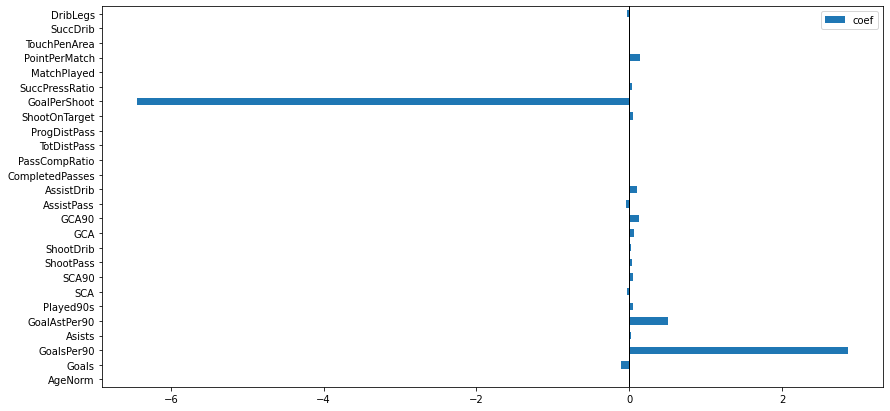

In [114]:
df_coef = results.params.to_frame().rename(columns={0: 'coef'})
# Visualize the coefficients
ax = df_coef.plot.barh(figsize=(14, 7))
ax.axvline(0, color='black', lw=1)

In [115]:
df.PlayerType.unique()

array(['Forward', 'Goalkeeper', 'Defender', 'Midfielder'], dtype=object)

In [116]:
df = pd.get_dummies(df,columns=['PlayerType'])

In [117]:
df.columns

Index(['Name', 'Position', 'Age', 'Min', 'Goals', 'GoalsPer90', 'Asists',
       'AsistsPer90', 'GoalAstPer90', 'Played90s', 'SCA', 'SCA90', 'ShootPass',
       'ShootDrib', 'GCA', 'GCA90', 'AssistPass', 'AssistDrib',
       'CompletedPasses', 'PassCompRatio', 'TotDistPass', 'ProgDistPass',
       'Crosses', 'PenaltyWon', 'AerialWonRate', 'ShootOnTarget', 'ShootPer90',
       'GoalPerShoot', 'TacklesWon', 'TklDribbling', 'Blocks',
       'SuccPressRatio', 'MatchPlayed', 'PointPerMatch', 'TouchPenArea',
       'SuccDrib', 'DribLegs', 'Value', 'Value2', 'NetValue', 'logValue',
       'AgeNorm', 'Succes', 'League_de Bundesliga',
       'League_eng Premier League', 'League_es La Liga', 'League_fr Ligue 1',
       'League_it Serie A', 'PlayerType_Defender', 'PlayerType_Forward',
       'PlayerType_Goalkeeper', 'PlayerType_Midfielder'],
      dtype='object')

In [125]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y,test_size=.2, random_state=10)
lreg = LinearRegression()
lreg.fit(x_train,y_train)
pred = lreg.predict(x_cv)

#Hataların karesel ortalamasına bakıyoruz
mse = np.mean((pred - y_cv)**2)
#modelin score r2
lreg.score(x_cv, y_cv)

0.18489917605385175

In [126]:
coeff = pd.DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = pd.Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,AgeNorm,0.002143
1,Min,0.001218
2,Goals,0.021720
3,GoalsPer90,-2.375090
4,Asists,0.081189
5,AsistsPer90,-0.434307
6,GoalAstPer90,1.064864
7,Played90s,-0.118492
8,SCA,-0.014638
9,SCA90,0.090932


In [163]:
df = df[df['PlayerType_Goalkeeper']==0]
df= df.fillna(0)
df = df.reset_index()

In [198]:
x_features = [  'Goals',  'Asists',  'SCA', 'ShootPass',
       'ShootDrib', 'GCA', 'GCA90', 'AssistPass', 'AssistDrib',
       'Crosses', 'PenaltyWon', 'AerialWonRate', 'ShootOnTarget', 
       'GoalPerShoot', 'TacklesWon', 'TklDribbling', 'Blocks',
       'SuccPressRatio', 'MatchPlayed',  'TouchPenArea',
       'SuccDrib', 'DribLegs', 'League_de Bundesliga', 'League_eng Premier League',
       'League_es La Liga', 'League_fr Ligue 1', 'League_it Serie A', 'AgeNorm' ] 


X = df[(df['PlayerType_Forward']==1) & (df['MatchPlayed']>20) ].reindex(columns=x_features)

y =df[(df['PlayerType_Forward']==1) & (df['MatchPlayed']>20) ].loc[:,"logValue"]

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# hold out 20% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

negative r^2 score means it's overfitting ! 

In [200]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [201]:
lm.score(X,y)

0.33048374034521677

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


"predicted_bar.savefig('predicted_bar.svg')\n"

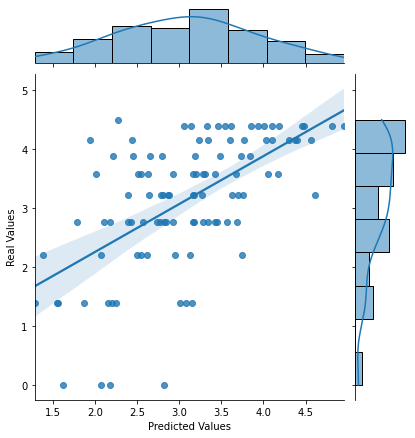

In [202]:
predicted_bar = sns.jointplot(lm.predict(X), y, kind="reg")
plt.xlabel ('Predicted Values')
plt.ylabel ('Real Values')
'''predicted_bar.savefig('predicted_bar.svg')
'''

In [548]:
# let's go back to feature tuning ! 

In [238]:
df['TouchPenArea2'] = df['TouchPenArea']**2

In [246]:
df_for = df[df['PlayerType_Defender']==1]
df_mid = df[df['PlayerType_Midfielder']==1]
df_def = df[df['PlayerType_Forward']==1]

In [273]:
df.columns

Index(['PlayerName', 'Name', 'Position', 'Age', 'Min', 'Goals', 'GoalsPer90',
       'Asists', 'AsistsPer90', 'GoalAstPer90', 'Played90s', 'SCA', 'SCA90',
       'ShootPass', 'ShootDrib', 'GCA', 'GCA90', 'AssistPass', 'AssistDrib',
       'CompletedPasses', 'PassCompRatio', 'TotDistPass', 'ProgDistPass',
       'Crosses', 'PenaltyWon', 'AerialWonRate', 'ShootOnTarget', 'ShootPer90',
       'GoalPerShoot', 'TacklesWon', 'TklDribbling', 'Blocks',
       'SuccPressRatio', 'MatchPlayed', 'PointPerMatch', 'TouchPenArea',
       'SuccDrib', 'DribLegs', 'Value', 'Value2', 'NetValue', 'logValue',
       'AgeNorm', 'Succes', 'League_de Bundesliga',
       'League_eng Premier League', 'League_es La Liga', 'League_fr Ligue 1',
       'League_it Serie A', 'PlayerType_Defender', 'PlayerType_Forward',
       'PlayerType_Goalkeeper', 'PlayerType_Midfielder', 'TouchPenArea2'],
      dtype='object')

In [283]:
x_features = [   'Age', 'Min', 'Goals', 
       'Asists',  
       'ShootPass', 'ShootDrib',  
      'ShootOnTarget',  
       'GoalPerShoot', 
       'SuccPressRatio', 'MatchPlayed', 'PointPerMatch', 'TouchPenArea',
       'SuccDrib', 'DribLegs',       'AgeNorm',  'League_de Bundesliga',
       'League_eng Premier League', 'League_es La Liga', 'League_fr Ligue 1',
       'League_it Serie A', 'PlayerType_Defender', 'PlayerType_Forward',
       'PlayerType_Goalkeeper', 'PlayerType_Midfielder', 'TouchPenArea2' ] 


X = df[(df['MatchPlayed']>20) ].reindex(columns=x_features)

y =df[(df['MatchPlayed']>20) ].loc[:,"logValue"]

In [284]:

# hold out 20% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=23)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=23)
lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: -0.257
Ridge Regression val R^2: -0.210
Degree 2 polynomial regression val R^2: -259.302


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


"predicted_bar.savefig('predicted_vs_real.svg')"

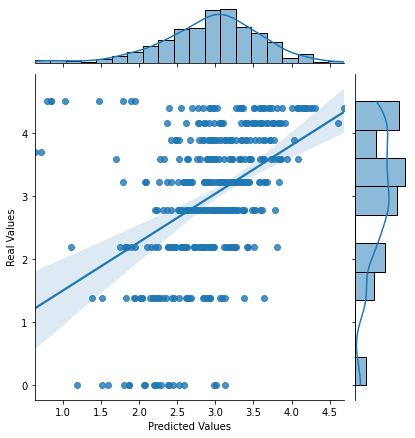

In [285]:
predicted_bar = sns.jointplot(lm.predict(X), y, kind="reg")
plt.xlabel ('Predicted Values')
plt.ylabel ('Real Values')
'''predicted_bar.savefig('predicted_vs_real.svg')'''

,Name,Position,Age,Min,Goals,GoalsPer90,Asists,AsistsPer90,GoalAstPer90,Played90s,...,League_fr Ligue 1,League_it Serie A,Age2,Agelog,PointPerMatch2,PlayerType_Defender,PlayerType_Forward,PlayerType_Goalkeeper,PlayerType_Midfielder,logValue2
PlayerName,,,,,,,,,,,,,,,,,,,,,
Aaron Connolly,Aaron Connolly,FW,19.0,1258,3,0.210,1,0.070,0.29,14.0,...,0,0,361.0,2.944439,1.442897,0,1,0,0,0.787195
Aaron Leya Iseka,Aaron Leya Iseka,FW,21.0,777,2,0.230,0,0.000,0.23,8.6,...,1,0,441.0,3.044522,0.019683,0,1,0,0,NaN
Adnan Januzaj,Adnan Januzaj,FW,24.0,1167,3,0.230,3,0.230,0.46,13.0,...,0,0,576.0,3.178054,3.112136,0,1,0,0,1.097189
Adrien Hunou,Adrien Hunou,FW,25.0,1210,8,0.600,1,0.070,0.67,13.4,...,1,0,625.0,3.218876,5.268024,0,1,0,0,0.665730
Ahmed Kutucu,Ahmed Kutucu,FW,19.0,679,3,0.400,2,0.270,0.66,7.5,...,0,0,361.0,2.944439,0.778688,0,1,0,0,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yann Karamoh,Yann Karamoh,FW,21.0,573,1,0.160,1,0.160,0.31,6.4,...,0,1,441.0,3.044522,0.079507,0,1,0,0,0.326634
Youssef En-Nesyri,Youssef En-Nesyri,FW,22.0,2181,8,0.355,2,0.065,0.42,24.2,...,0,0,484.0,3.091042,1.706490,0,1,0,0,0.834032
Yussuf Poulsen,Yussuf Poulsen,FW,25.0,1222,5,0.370,6,0.440,0.81,13.6,...,0,0,625.0,3.218876,5.545233,0,1,0,0,1.097189


In [746]:
x_features = [   'Goals',  'Asists',
        'ShootDrib', 'GCA', 'GCA90', 'AssistPass', 'AssistDrib',
       'Crosses',   'ShootOnTarget', 
       'GoalPerShoot',   'MatchPlayed', 'PointPerMatch', 'TouchPenArea',
       'SuccDrib', 'DribLegs', 'League_de Bundesliga', 'League_eng Premier League',
       'League_es La Liga', 'League_fr Ligue 1', 'League_it Serie A', 'Age2',
       'Agelog', 'PointPerMatch2'   ] 

X = df[ ( df['MatchPlayed']>20) & (df['PlayerType_Forward']==1)].reindex(columns=x_features)

y = df[ ( df['MatchPlayed']>20) & (df['PlayerType_Forward']==1)].loc[:,"logValue"]

model = sm.OLS(y, X, data=df_for)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logValue   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     31.36
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           2.30e-50
Time:                        12:50:49   Log-Likelihood:                -150.82
No. Observations:                 205   AIC:                             347.6
Df Residuals:                     182   BIC:                             424.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Goals                         0.0357      0.021      1.738      0.084      -0.005       0.076
Asists                        0.0020      0.033      0.062      0.951      -0.063       0.067
ShootDrib                     0.0068      0.017      0.401      0.689      -0.027       0.040
GCA                          -0.0203      0.036     -0.567      0.571      -0.091       0.050
GCA90                         0.0078      0.540      0.015      0.988      -1.057       1.073
AssistPass                    0.0463      0.033      1.388      0.167      -0.020       0.112
AssistDrib                    0.0420      0.050      0.847      0.398      -0.056       0.140
Crosses                       0.0067      0.002      3.058      0.003       0.002       0.011
ShootOnTarget                 0.0066      0.009      0.727      0.468      -0.011       0.024
GoalPerShoot                 -0.2952      0.918     -0.322      0.748      -2.106       1.515
MatchPlayed                  -0.0264      0.013     -2.104      0.037      -0.051      -0.002
PointPerMatch                 1.0744      0.286      3.762      0.000       0.511       1.638
TouchPenArea                  0.0021      0.002      1.224      0.222      -0.001       0.006
SuccDrib                     -0.0042      0.004     -1.024      0.307      -0.012       0.004
DribLegs                      0.0075      0.025      0.302      0.763      -0.042       0.057
League_de Bundesliga        -33.9216      3.864     -8.779      0.000     -41.546     -26.298
League_eng Premier League   -32.6094      3.845     -8.481      0.000     -40.196     -25.023
League_es La Liga           -33.2326      3.860     -8.609      0.000     -40.849     -25.616
League_fr Ligue 1           -34.1407      3.848     -8.872      0.000     -41.733     -26.548
League_it Serie A           -33.5091      3.849     -8.706      0.000     -41.103     -25.915
Age2                         -0.0115      0.001    -11.411      0.000      -0.014      -0.010
Agelog                       13.0046      1.375      9.455      0.000      10.291      15.718
PointPerMatch2               -0.0487      0.035     -1.401      0.163      -0.117       0.020
==============================================================================
Omnibus:                        3.680   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                4.340
Skew:                          -0.060   Prob(JB):                        0.114
Kurtosis:                       3.703   Cond. No.                     1.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+05. This might indicate 

score : 0.7850359730410148


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(27.0, 0.5, 'Real Values')

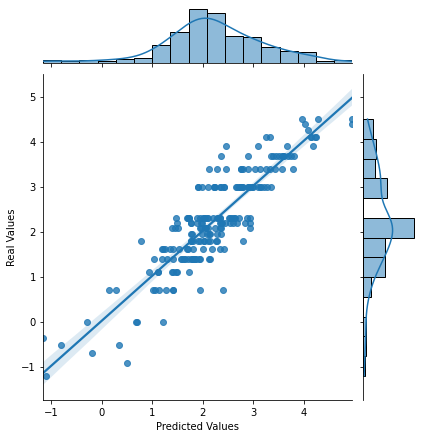

In [747]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)
lm = LinearRegression()
lm.fit(X_train,y_train)
print('score : ' + str(lm.score(X,y) ) )
predicted_bar = sns.jointplot(lm.predict(X), y, kind="reg")
plt.xlabel ('Predicted Values - Forward')
plt.ylabel ('Real Values- Forward')

score : 0.7370542076488784


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(27.0, 0.5, 'Real Values -Mieldfield')

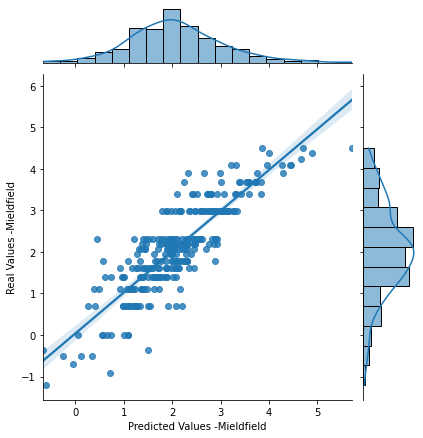

In [750]:
x_features = [   'Goals',  'Asists',
        'ShootDrib',  'AssistPass', 'AssistDrib',
       'Crosses',   'ShootOnTarget', 
       'GoalPerShoot',   'MatchPlayed', 'PointPerMatch', 'TouchPenArea',
       'SuccDrib', 'DribLegs', 'League_de Bundesliga', 'League_eng Premier League',
       'League_es La Liga', 'League_fr Ligue 1', 'League_it Serie A', 'Age2',
       'Agelog', 'PointPerMatch2'   ] 

X = df[ ( df['MatchPlayed']>10) & (df['PlayerType_Forward']==1)].reindex(columns=x_features)

y = df[ ( df['MatchPlayed']>10) & (df['PlayerType_Forward']==1)].loc[:,"logValue"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)
lm = LinearRegression()
lm.fit(X_train,y_train)
print('score : ' + str(lm.score(X,y) ) )
predicted_bar = sns.jointplot(lm.predict(X), y, kind="reg")
plt.xlabel ('Predicted Values -Mieldfield')
plt.ylabel ('Real Values -Mieldfield')

In [758]:
burak = lm.predict(X)

In [762]:
burak = pd.DataFrame(data=burak, columns=['predictValue']) 
burak

,predictValue
0,2.185340
1,0.352507
2,2.478750
3,1.967516
4,0.577504
...,...
274,0.966782
275,2.336925
276,2.169810
277,1.777902


In [768]:
burak2 = y.reset_index()

In [770]:
burak2 = burak2.merge(burak,left_index=True, right_index=True)
burak2

,PlayerName,logValue,predictValue
0,Aaron Connolly,2.197225,2.185340
1,Aaron Leya Iseka,-0.510826,0.352507
2,Adnan Januzaj,2.995732,2.478750
3,Adrien Hunou,1.945910,1.967516
4,Ahmed Kutucu,0.000000,0.577504
...,...,...,...
274,Yann Karamoh,1.386294,0.966782
275,Youssef En-Nesyri,2.302585,2.336925
276,Yussuf Poulsen,2.995732,2.169810
277,Zinedine Ferhat,1.791759,1.777902


In [ ]:
burak2['Value'] = np.exp(10,burak2['logValue'])
burak2['PredValue'] = np.exp(10,burak2['predictValue'])

In [ ]:
burak2.sort_values('Value',ascending=False)